In [1]:
# Import all the necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


# Import local scripts
sys.path.append("../../scripts")  # Add the folder to Python's search path
from exploratory_data_analysis import data_exploration
from data_engineering import features_addition

In [2]:
# Load the data
raw_data = pd.read_csv("../../datasets/heart_disease_uci/heart_disease_uci.csv", index_col=0)

raw_data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## 📌 Summary of UCI Heart Disease Dataset Variables & Their Meanings

This dataset contains medical attributes used to predict heart disease. Below is a structured explanation of each variable:

### 🔹 Patient Information

- **id** → Unique identifier for each patient.
- **age** → Patient’s age (in years).
- **sex** → Biological sex of the patient (0 = Female, 1 = Male).
- **dataset** → Source location where the data was collected (e.g., Cleveland, Hungary).

### 🔹 Symptoms & Clinical Measurements

- **cp (Chest Pain Type)** → Type of chest pain experienced by the patient:
  - 1 = Typical Angina → Chest pain due to reduced blood flow.
  - 2 = Atypical Angina → Chest discomfort not related to heart disease.
  - 3 = Non-Anginal Pain → Pain unrelated to the heart.
  - 4 = Asymptomatic → No chest pain but potential heart disease.

- **trestbps (Resting Blood Pressure)** → Blood pressure (mmHg) recorded while at rest. High values may indicate hypertension.

- **chol (Serum Cholesterol)** → Cholesterol level (mg/dl). Higher values suggest a risk of heart disease.

- **fbs (Fasting Blood Sugar)** → Whether blood sugar is > 120 mg/dl:
  - 0 = Normal
  - 1 = High (Diabetes risk)

- **restecg (Resting Electrocardiographic Results)** → Measures heart electrical activity:
  - 0 = Normal
  - 1 = ST-T wave abnormality (possible ischemia)
  - 2 = Left Ventricular Hypertrophy (LVH) (thickened heart muscle)

- **thalach (Maximum Heart Rate Achieved)** → Peak heart rate during exercise. Higher values indicate better heart function.

- **exang (Exercise-Induced Angina)** → Chest pain triggered by exercise:
  - 0 = No
  - 1 = Yes (possible heart disease)

### 🔹 Heart Function & Risk Indicators

- **oldpeak (ST Depression Induced by Exercise)** → Difference in ST segment levels between exercise and rest.
  - Higher values suggest myocardial ischemia (reduced blood flow).

- **slope (Slope of Peak Exercise ST Segment)** → Shape of the ST segment after exercise:
  - 1 = Upsloping (low risk)
  - 2 = Flat (moderate risk)
  - 3 = Downsloping (high risk)

- **ca (Number of Major Vessels Colored by Fluoroscopy)** → Count of major blood vessels visible under imaging (0-3).
  - Higher numbers usually reduce the risk of heart disease.

- **thal (Thalassemia – Blood Disorder Affecting Hemoglobin Production)**
  - 3 = Normal
  - 6 = Fixed Defect (permanent blood flow issue)
  - 7 = Reversible Defect (temporary blood flow issue, possible ischemia)

### 🔹 Target Variable

- **num (Heart Disease Stage Prediction)** → Indicates the severity of heart disease:
  - 0 = Healthy (No heart disease)
  - 1-4 = Increasing severity of heart disease, with 4 being the most severe stage.

### 💡 Key Takeaways:

✔ **cp, oldpeak, thalach, slope, and ca** are strong predictors of heart disease.  
✔ Higher cholesterol (**chol**) and resting blood pressure (**trestbps**) may indicate risk factors.  
✔ **thal, exang, and restecg** provide additional diagnostic insights.


In [3]:
# Print shape of the data
print("Raw data shape:", raw_data.shape)

data_exploration.resume_table(raw_data)

Raw data shape: (920, 15)


,type,nb_nan,nb_unique,v1,v2,v3
age,int64,0,50,63,67,67
sex,object,0,2,Male,Male,Male
dataset,object,0,4,Cleveland,Cleveland,Cleveland
cp,object,0,4,typical angina,asymptomatic,asymptomatic
trestbps,float64,59,61,145.0,160.0,120.0
chol,float64,30,217,233.0,286.0,229.0
fbs,object,90,2,True,False,False
restecg,object,2,3,lv hypertrophy,lv hypertrophy,lv hypertrophy
thalch,float64,55,119,150.0,108.0,129.0
exang,object,55,2,False,True,True


Raw data shape: (920, 15)


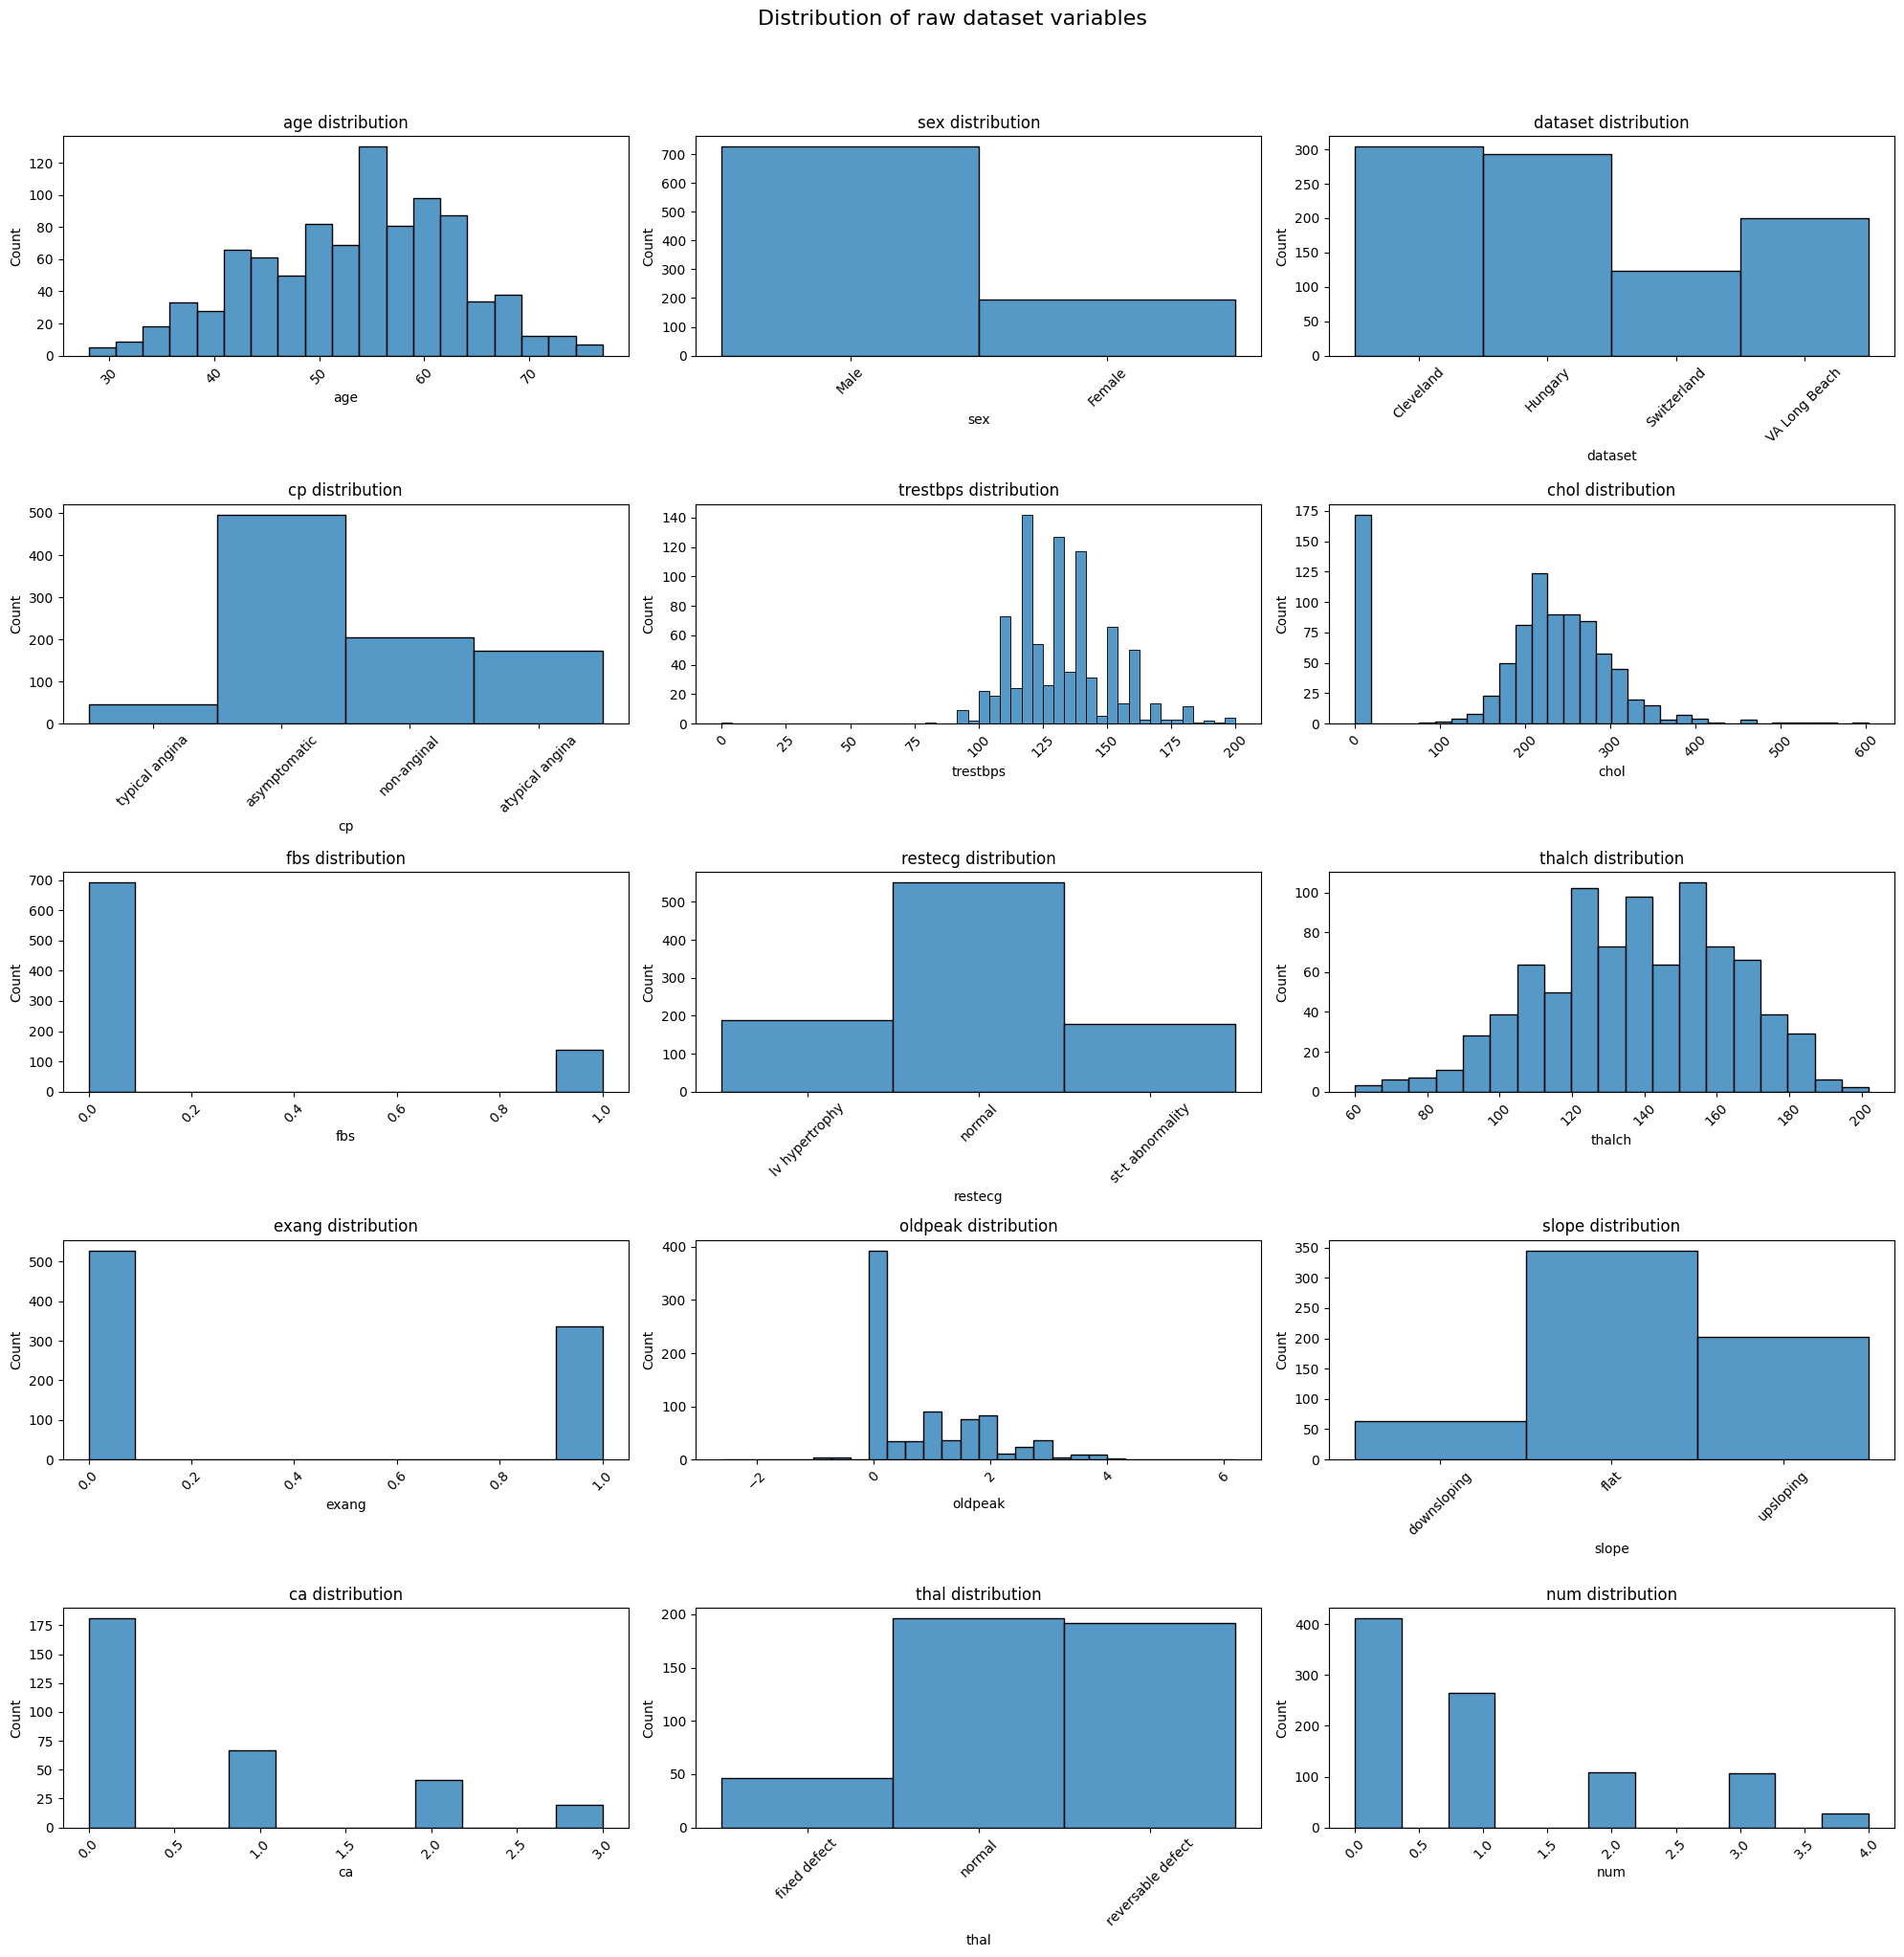

In [4]:
print("Raw data shape:", raw_data.shape)
suptitle = "Distribution of raw dataset variables"
data_exploration.distribution_matrix(df= raw_data, cols=raw_data.columns, dimensions=(5,3), figsize=(20, 20), suptitle=suptitle)

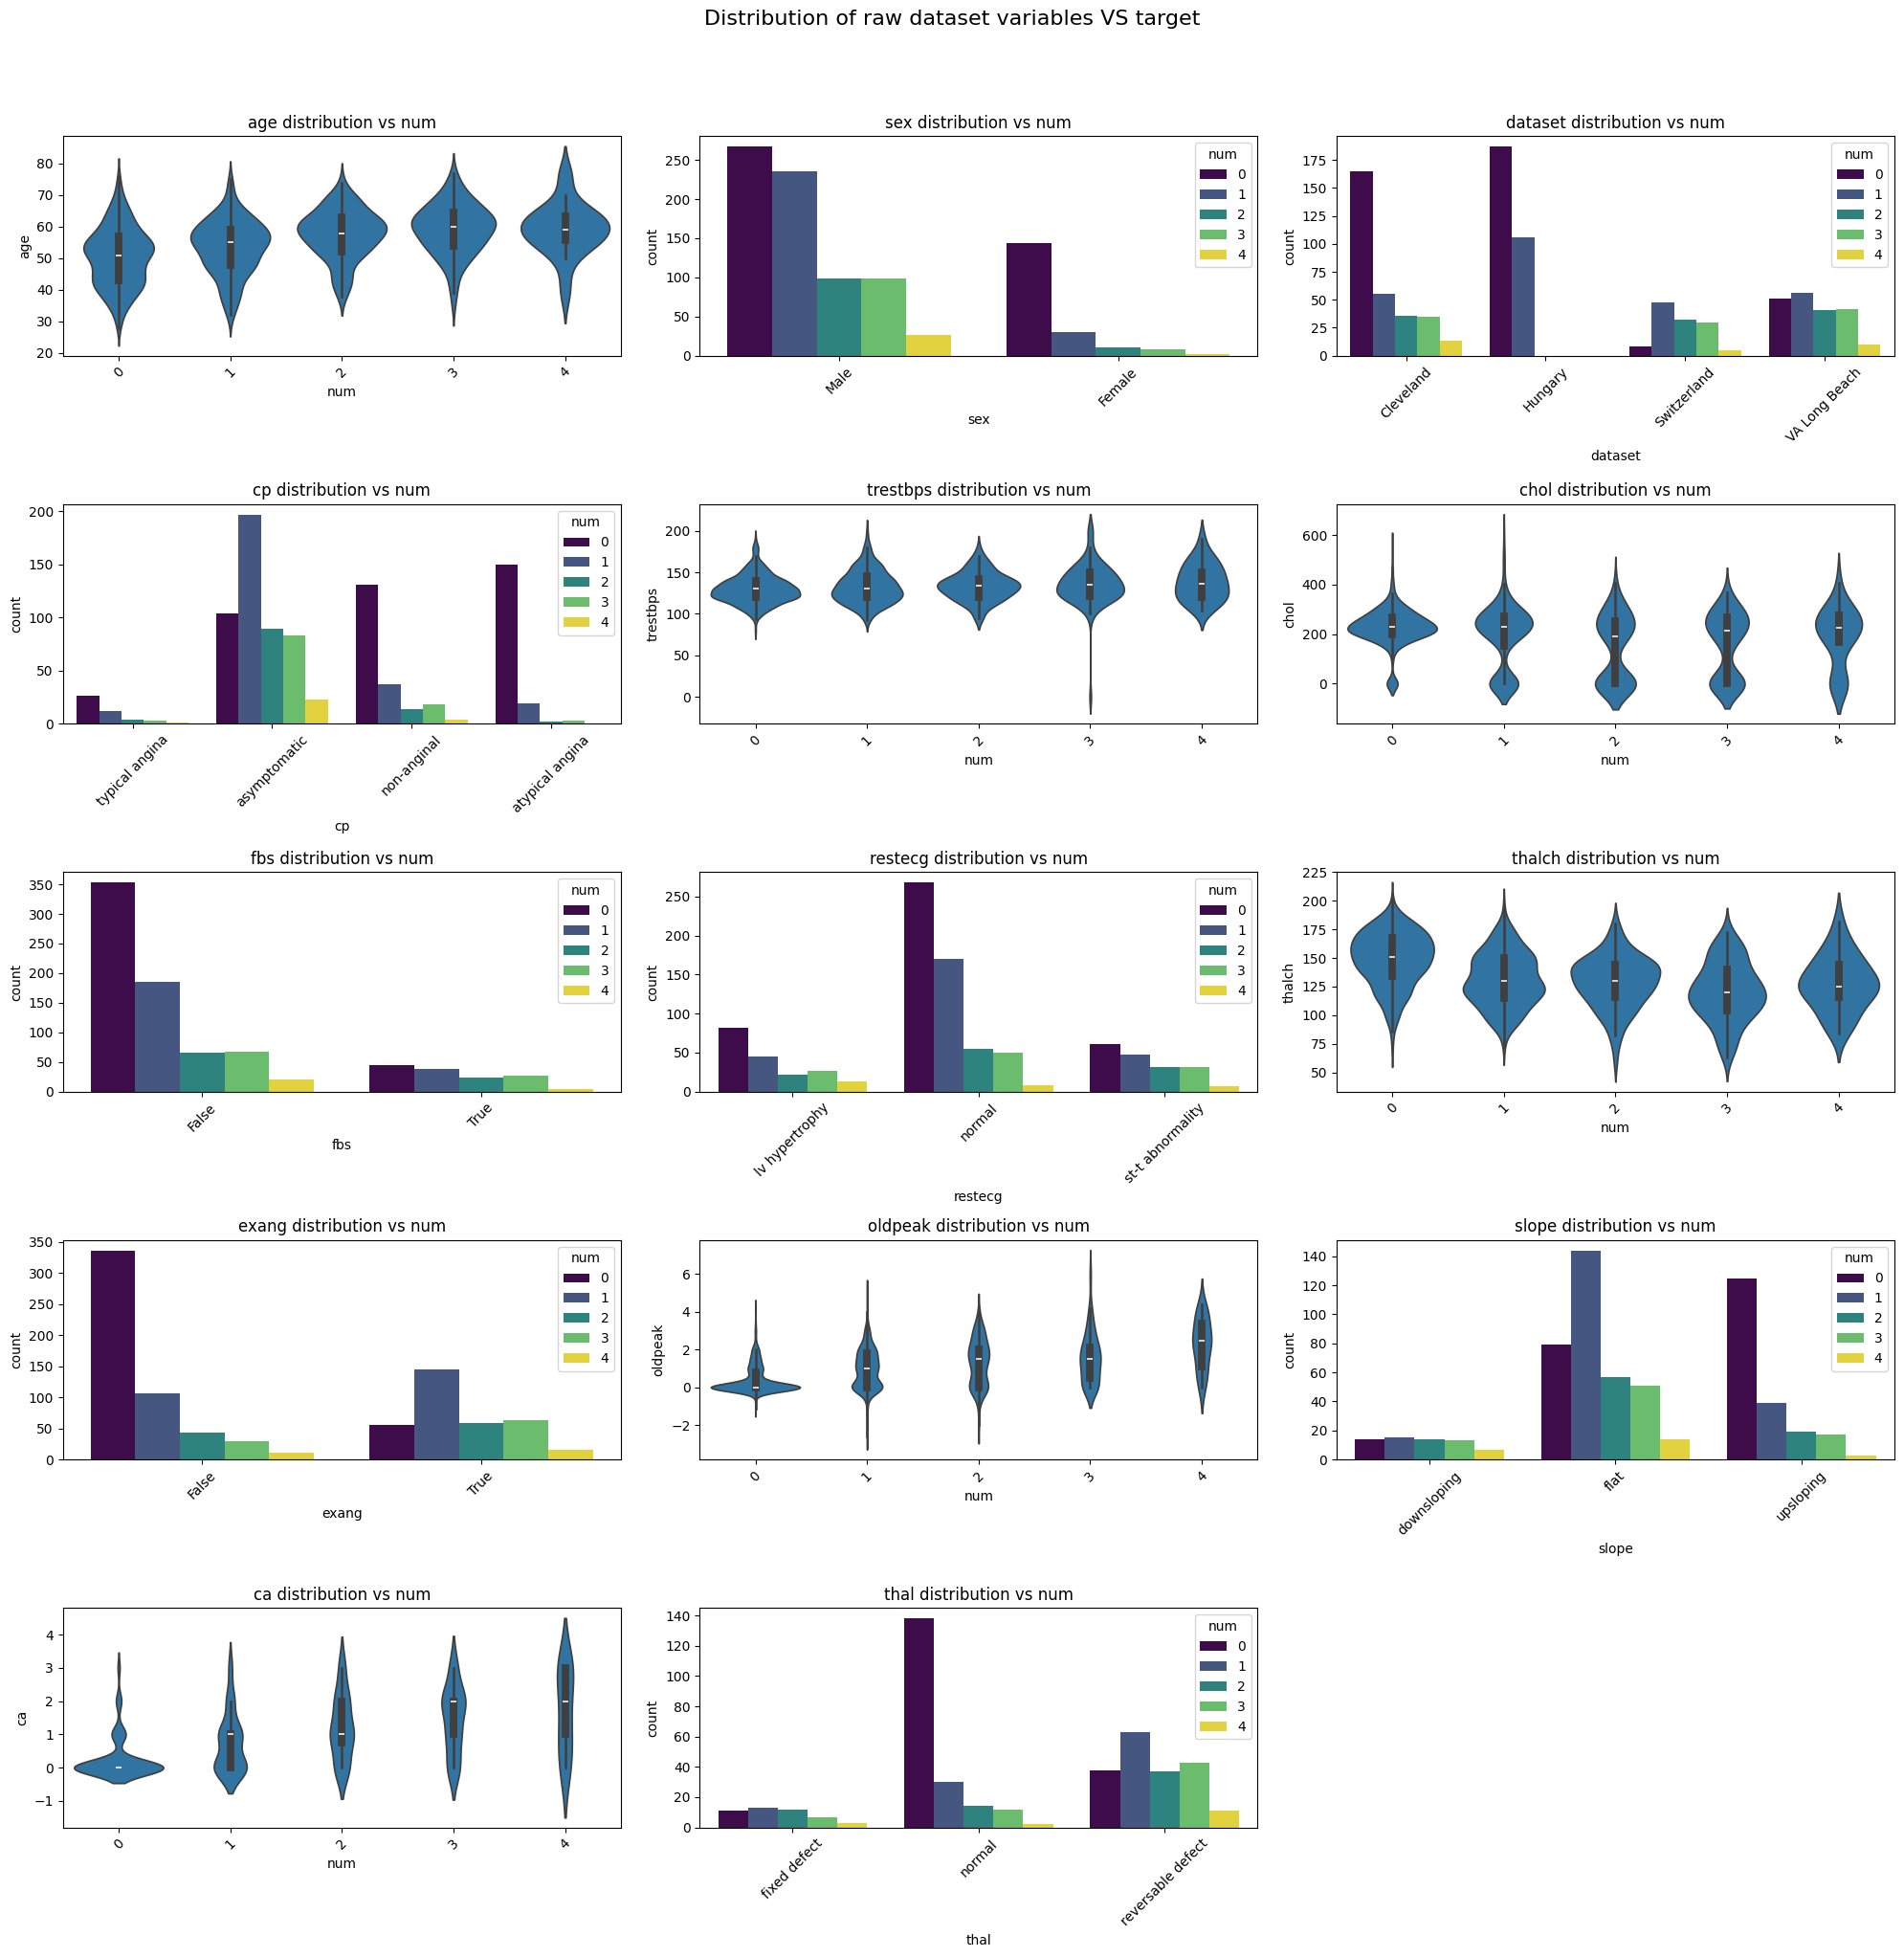

In [5]:
# Print distribution of variables VS target
suptitle = "Distribution of raw dataset variables VS target"
data_exploration.distribution_matrix_vs_target(df=raw_data, target="num", cols=raw_data.columns[:-1], dimensions=(5,3), figsize=(20, 20), suptitle=suptitle)

# Investigate NaN values

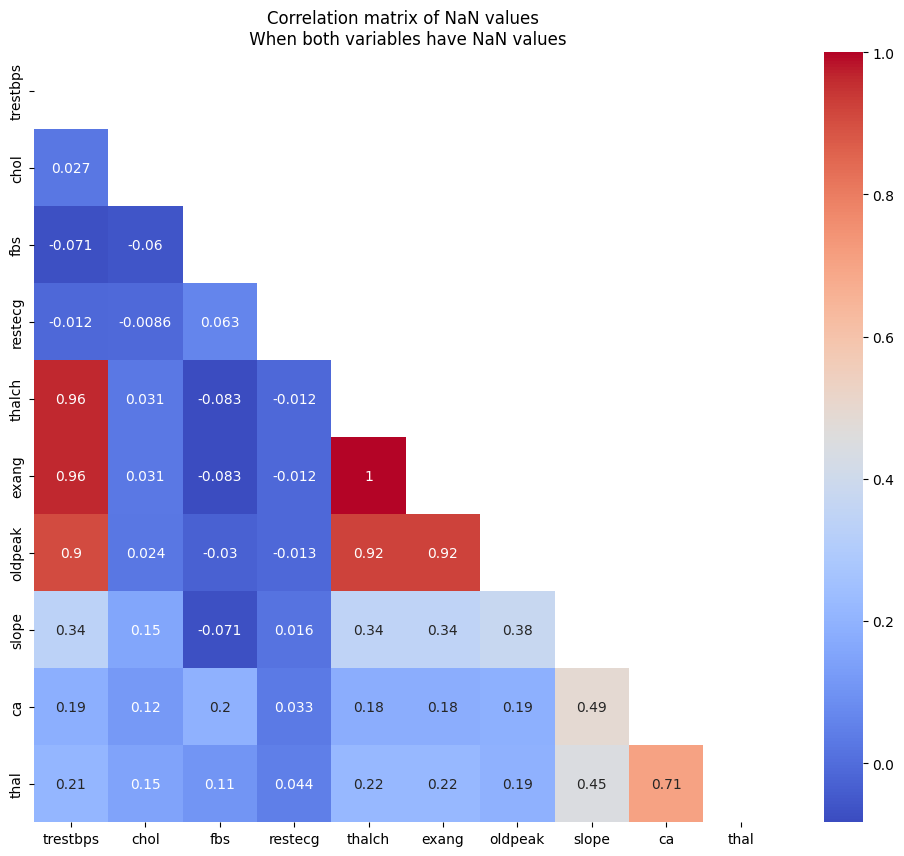

,Feature 1,Feature 2,Correlation
0,exang,thalch,1.000000
1,thalch,trestbps,0.963272
2,exang,trestbps,0.963272
3,oldpeak,thalch,0.919752
4,oldpeak,exang,0.919752
5,oldpeak,trestbps,0.903014
6,thal,ca,0.706441


Number of NaN values per feature:


ca          611
chol         30
exang        55
fbs          90
oldpeak      62
restecg       2
slope       309
thal        486
thalch       55
trestbps     59
dtype: int64

In [6]:
# A correlation matrix to find which features are correlated with NaN values
df_is_nan_01 = raw_data.copy()
df_is_nan_01 = df_is_nan_01.isna()

# Drop variables that have no NaN values (all False)
df_is_nan_01 = df_is_nan_01.loc[:, df_is_nan_01.any()]

# Table with correlation values descending and replace upper triangle with NaN
df_is_nan_corr = df_is_nan_01.corr()

# Mask the lower triangle
mask = np.triu(np.ones_like(df_is_nan_corr, dtype=bool))

# Seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_is_nan_corr, annot=True, cmap="coolwarm", mask=mask)
plt.title("Correlation matrix of NaN values \n When both variables have NaN values")
plt.show()

# Mask the upper triangle, k=1 to exclude the diagonal
df_is_nan_corr = df_is_nan_corr.where(np.triu(np.ones(df_is_nan_corr.shape), k=1).astype(np.bool))

# Keep only correlations higher than 0.5
df_is_nan_corr = df_is_nan_corr[np.abs(df_is_nan_corr) > 0.5]

# Unstack the correlation matrix, sort values descending
df_is_nan_corr = df_is_nan_corr.unstack().sort_values(ascending=False)

# Drop NaN values
df_is_nan_corr = df_is_nan_corr.dropna()

# Convert to DataFrame and reset index
df_is_nan_corr = df_is_nan_corr.to_frame().reset_index()

# Rename columns
df_is_nan_corr.columns = ["Feature 1", "Feature 2", "Correlation"]

# Sort values by Feature 1 and Correlation
# df_is_nan_corr = df_is_nan_corr.sort_values(by=["Feature 1", "Correlation"], ascending=False)

# Print table
display(df_is_nan_corr)

# Count the number of NaN values per feature
print("Number of NaN values per feature:")
display(df_is_nan_01.sum().sort_index(ascending=True))

### Variable Explanations  

- **`thalch`** (Maximum Heart Rate Achieved) → Peak heart rate during exercise. Higher values indicate better heart function.  
- **`exang`** (Exercise-Induced Angina) → Chest pain triggered by exercise.  
- **`trestbps`** (Resting Blood Pressure) → Blood pressure (mmHg) recorded while at rest. High values may indicate hypertension.  
- **`oldpeak`** (ST Depression Induced by Exercise) → Difference in ST segment levels between exercise and rest. Higher values suggest myocardial ischemia (reduced blood flow).  
- **`thal`** (Thalassemia – Blood Disorder Affecting Hemoglobin Production).  
- **`ca`** (Number of Major Vessels Colored by Fluoroscopy) → Count of major blood vessels visible under imaging (0-3). Higher numbers usually reduce the risk of heart disease.  

### Possible Data Dependencies & Missing Value Explanations  

- **`exang` + `thalch`** → No exercise done.  
- **`thalch` + `trestbps`** → Irrelevant without maximum heart rate.  
- **`exang` + `trestbps`** → Irrelevant without maximum heart rate.  
- **`oldpeak` + `thalch`** → No exercise done.  
- **`oldpeak` + `exang`** → No exercise done / No ECG done.  
- **`oldpeak` + `trestbps`** → No exercise done.  
- **`thal` + `ca`** → No imaging capabilities available.  

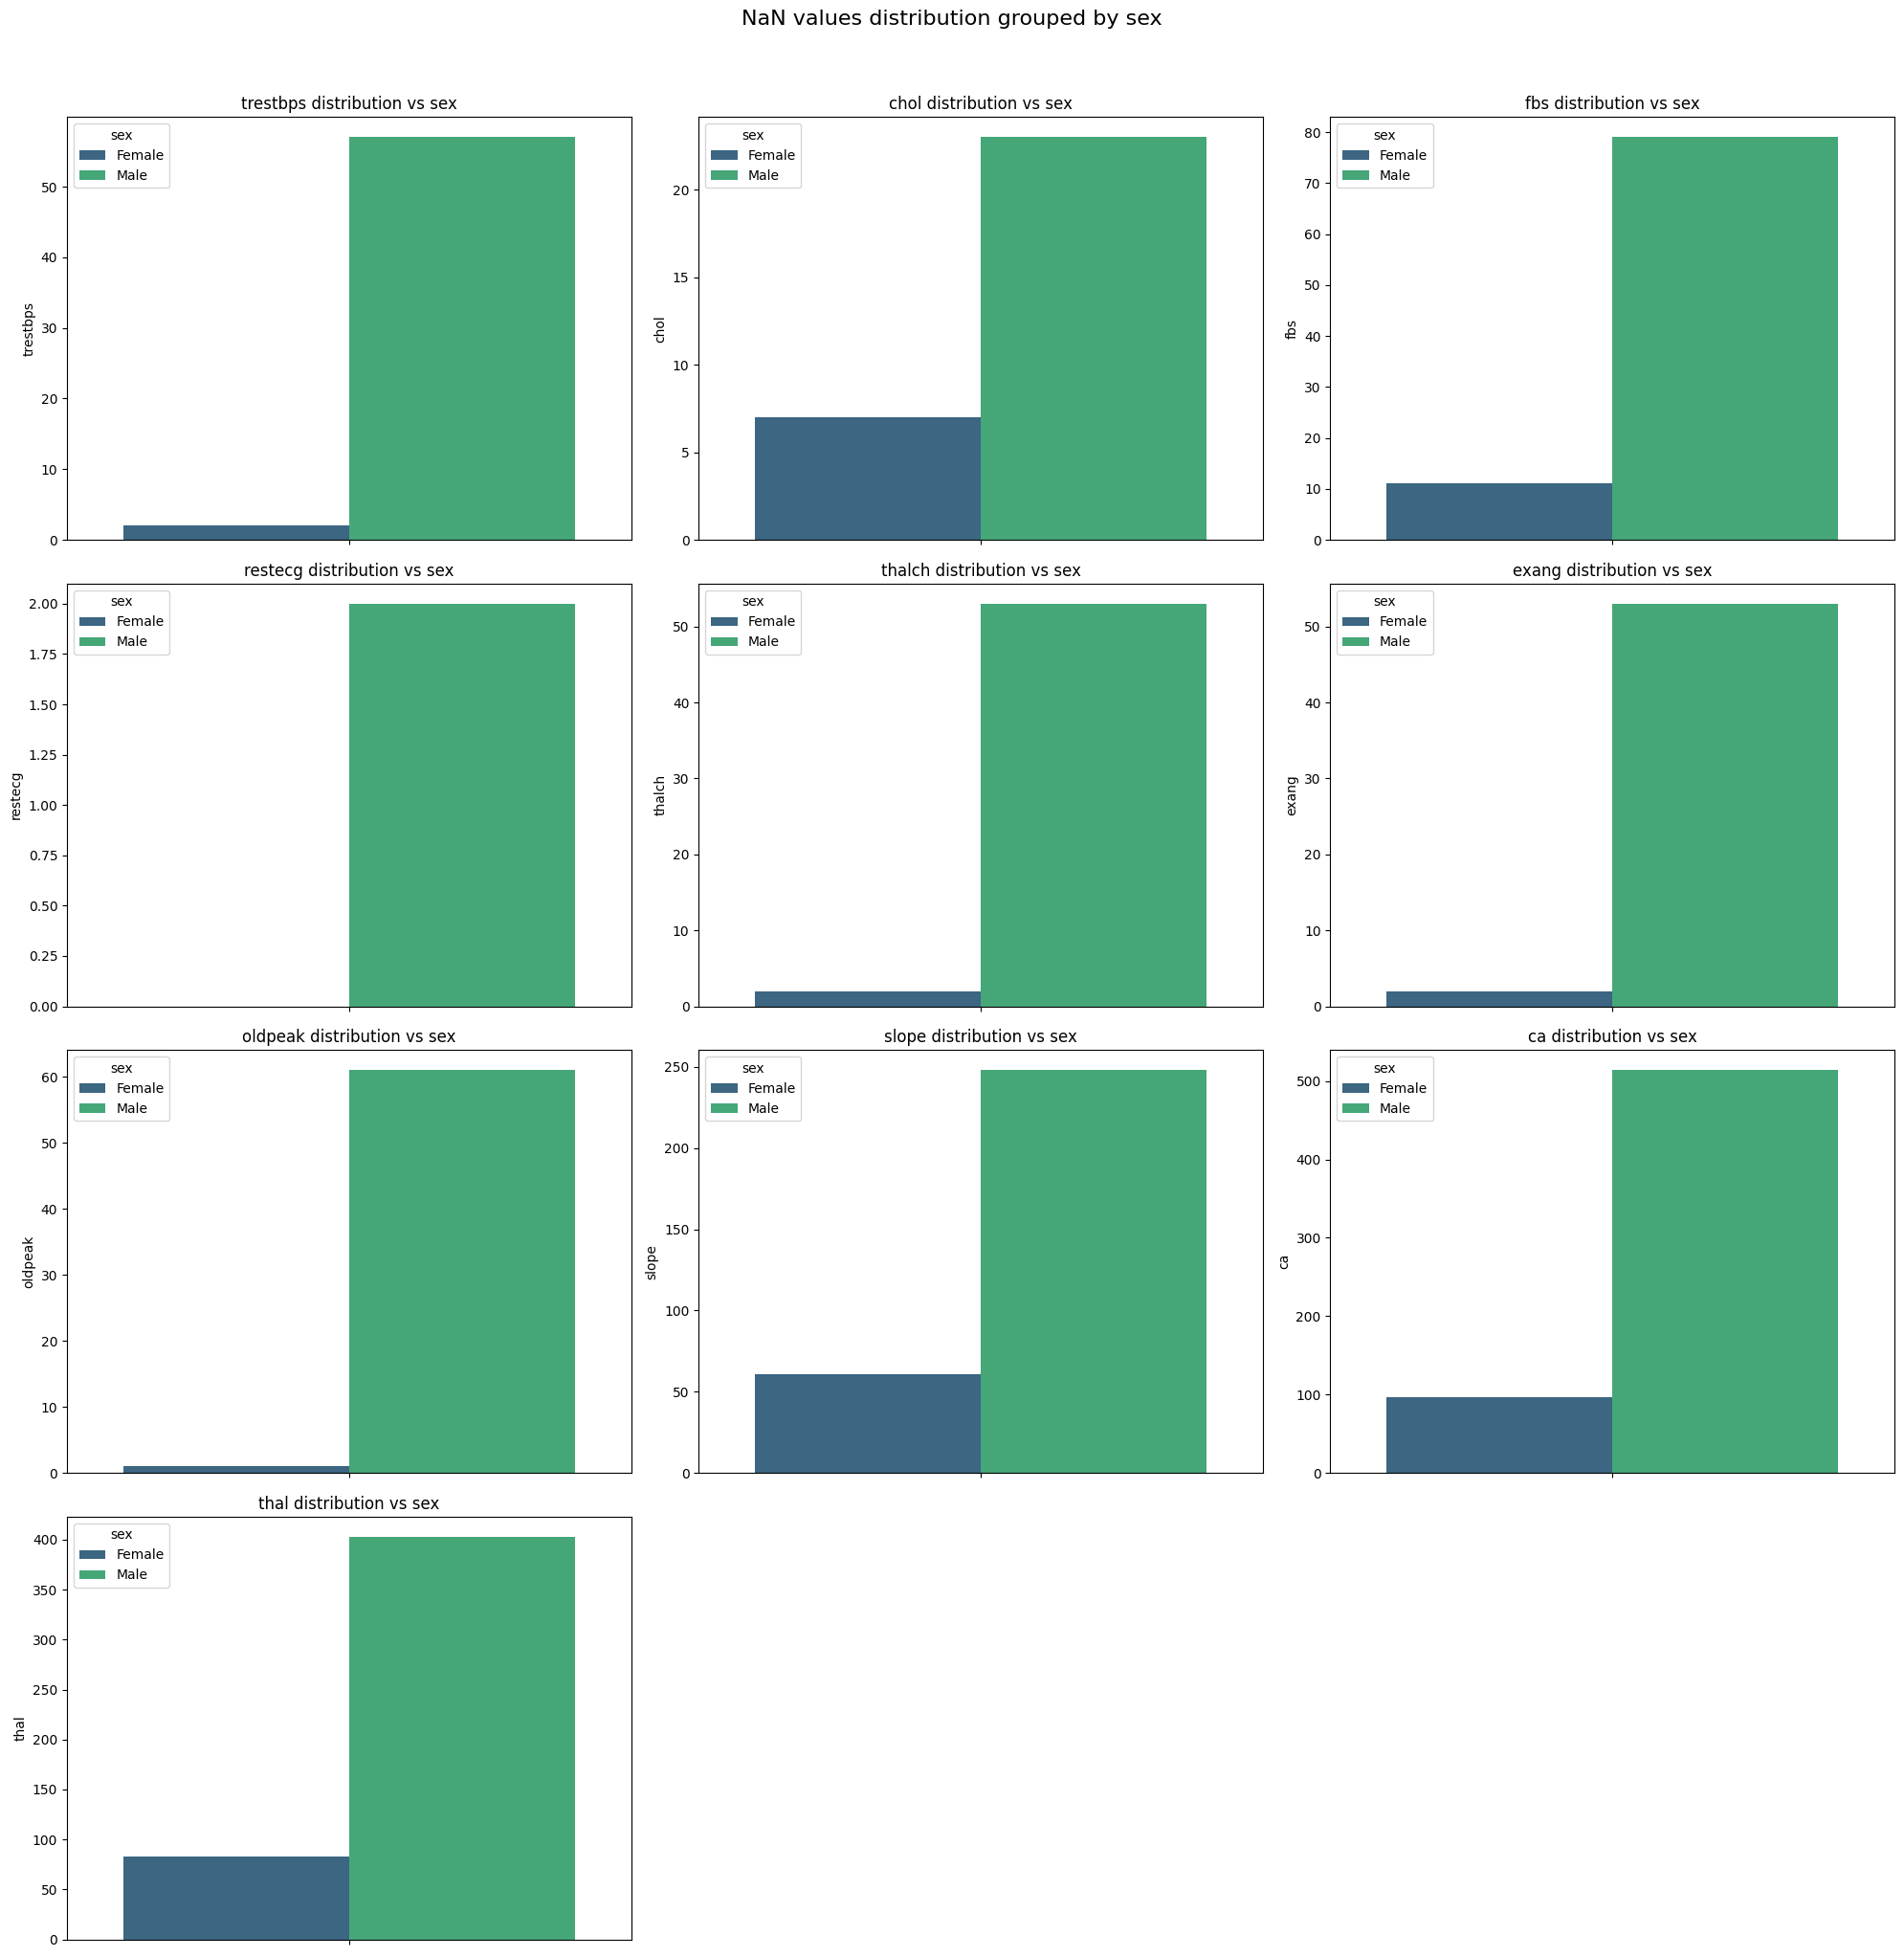

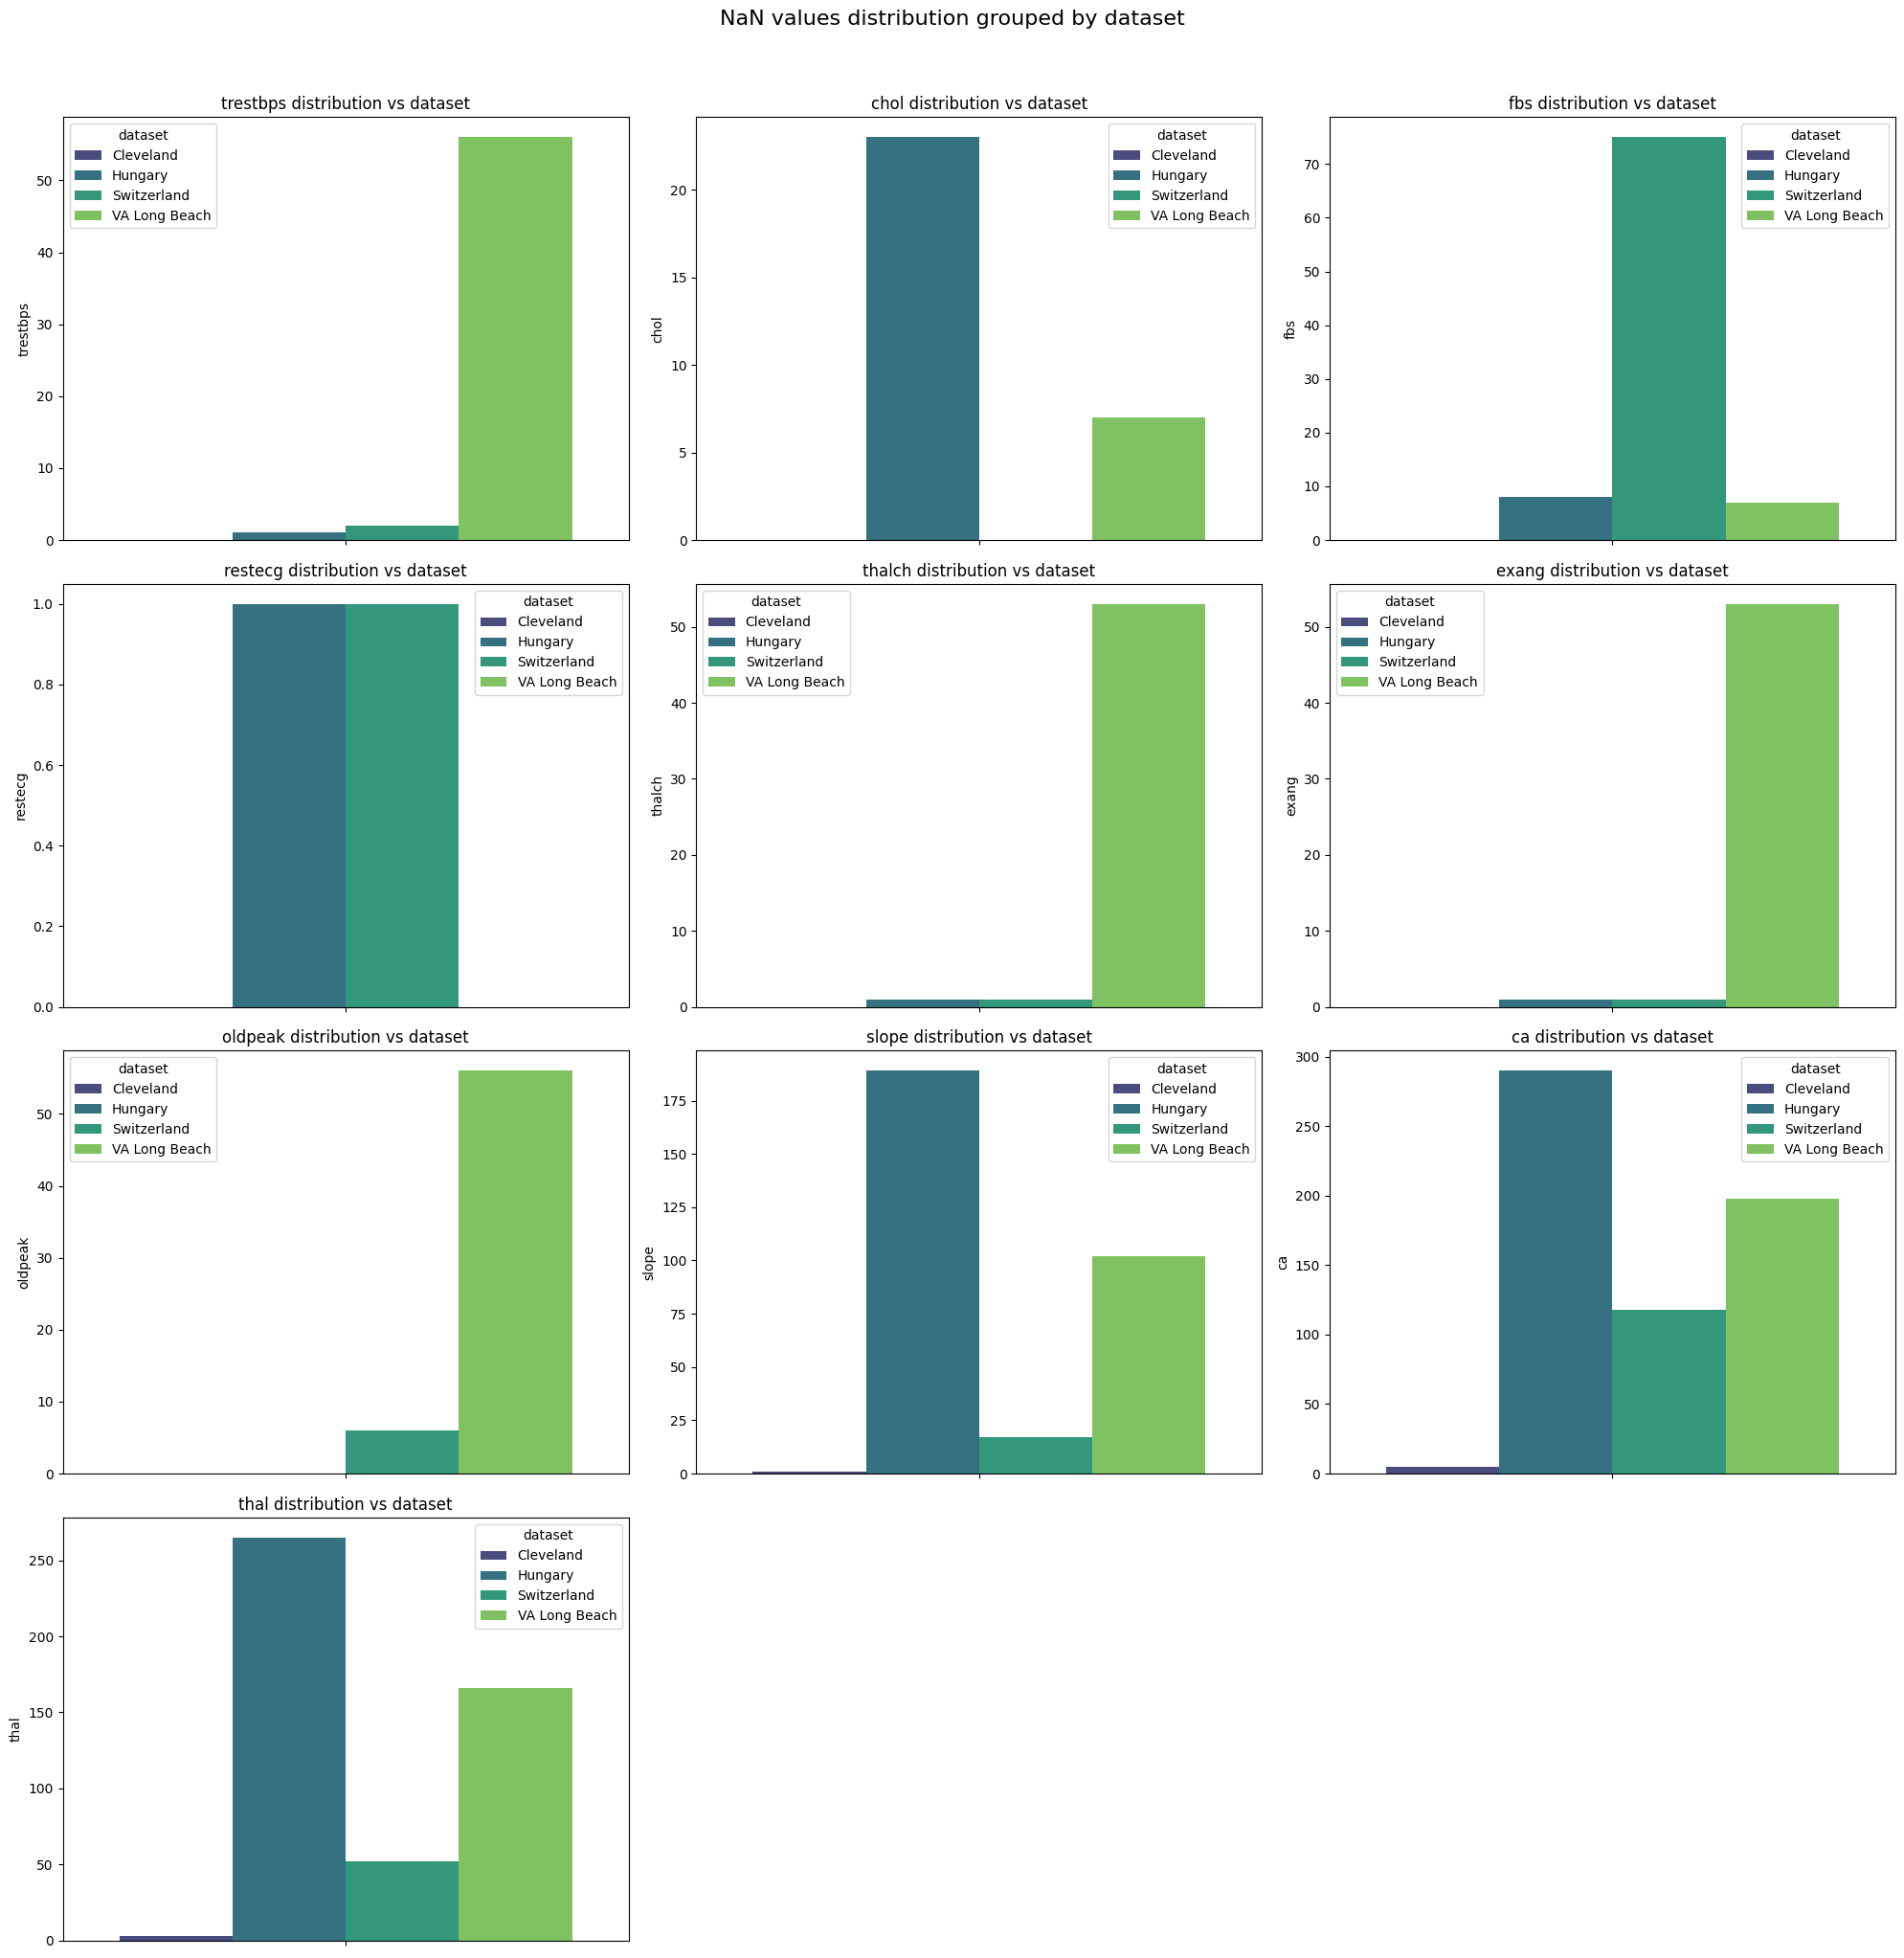

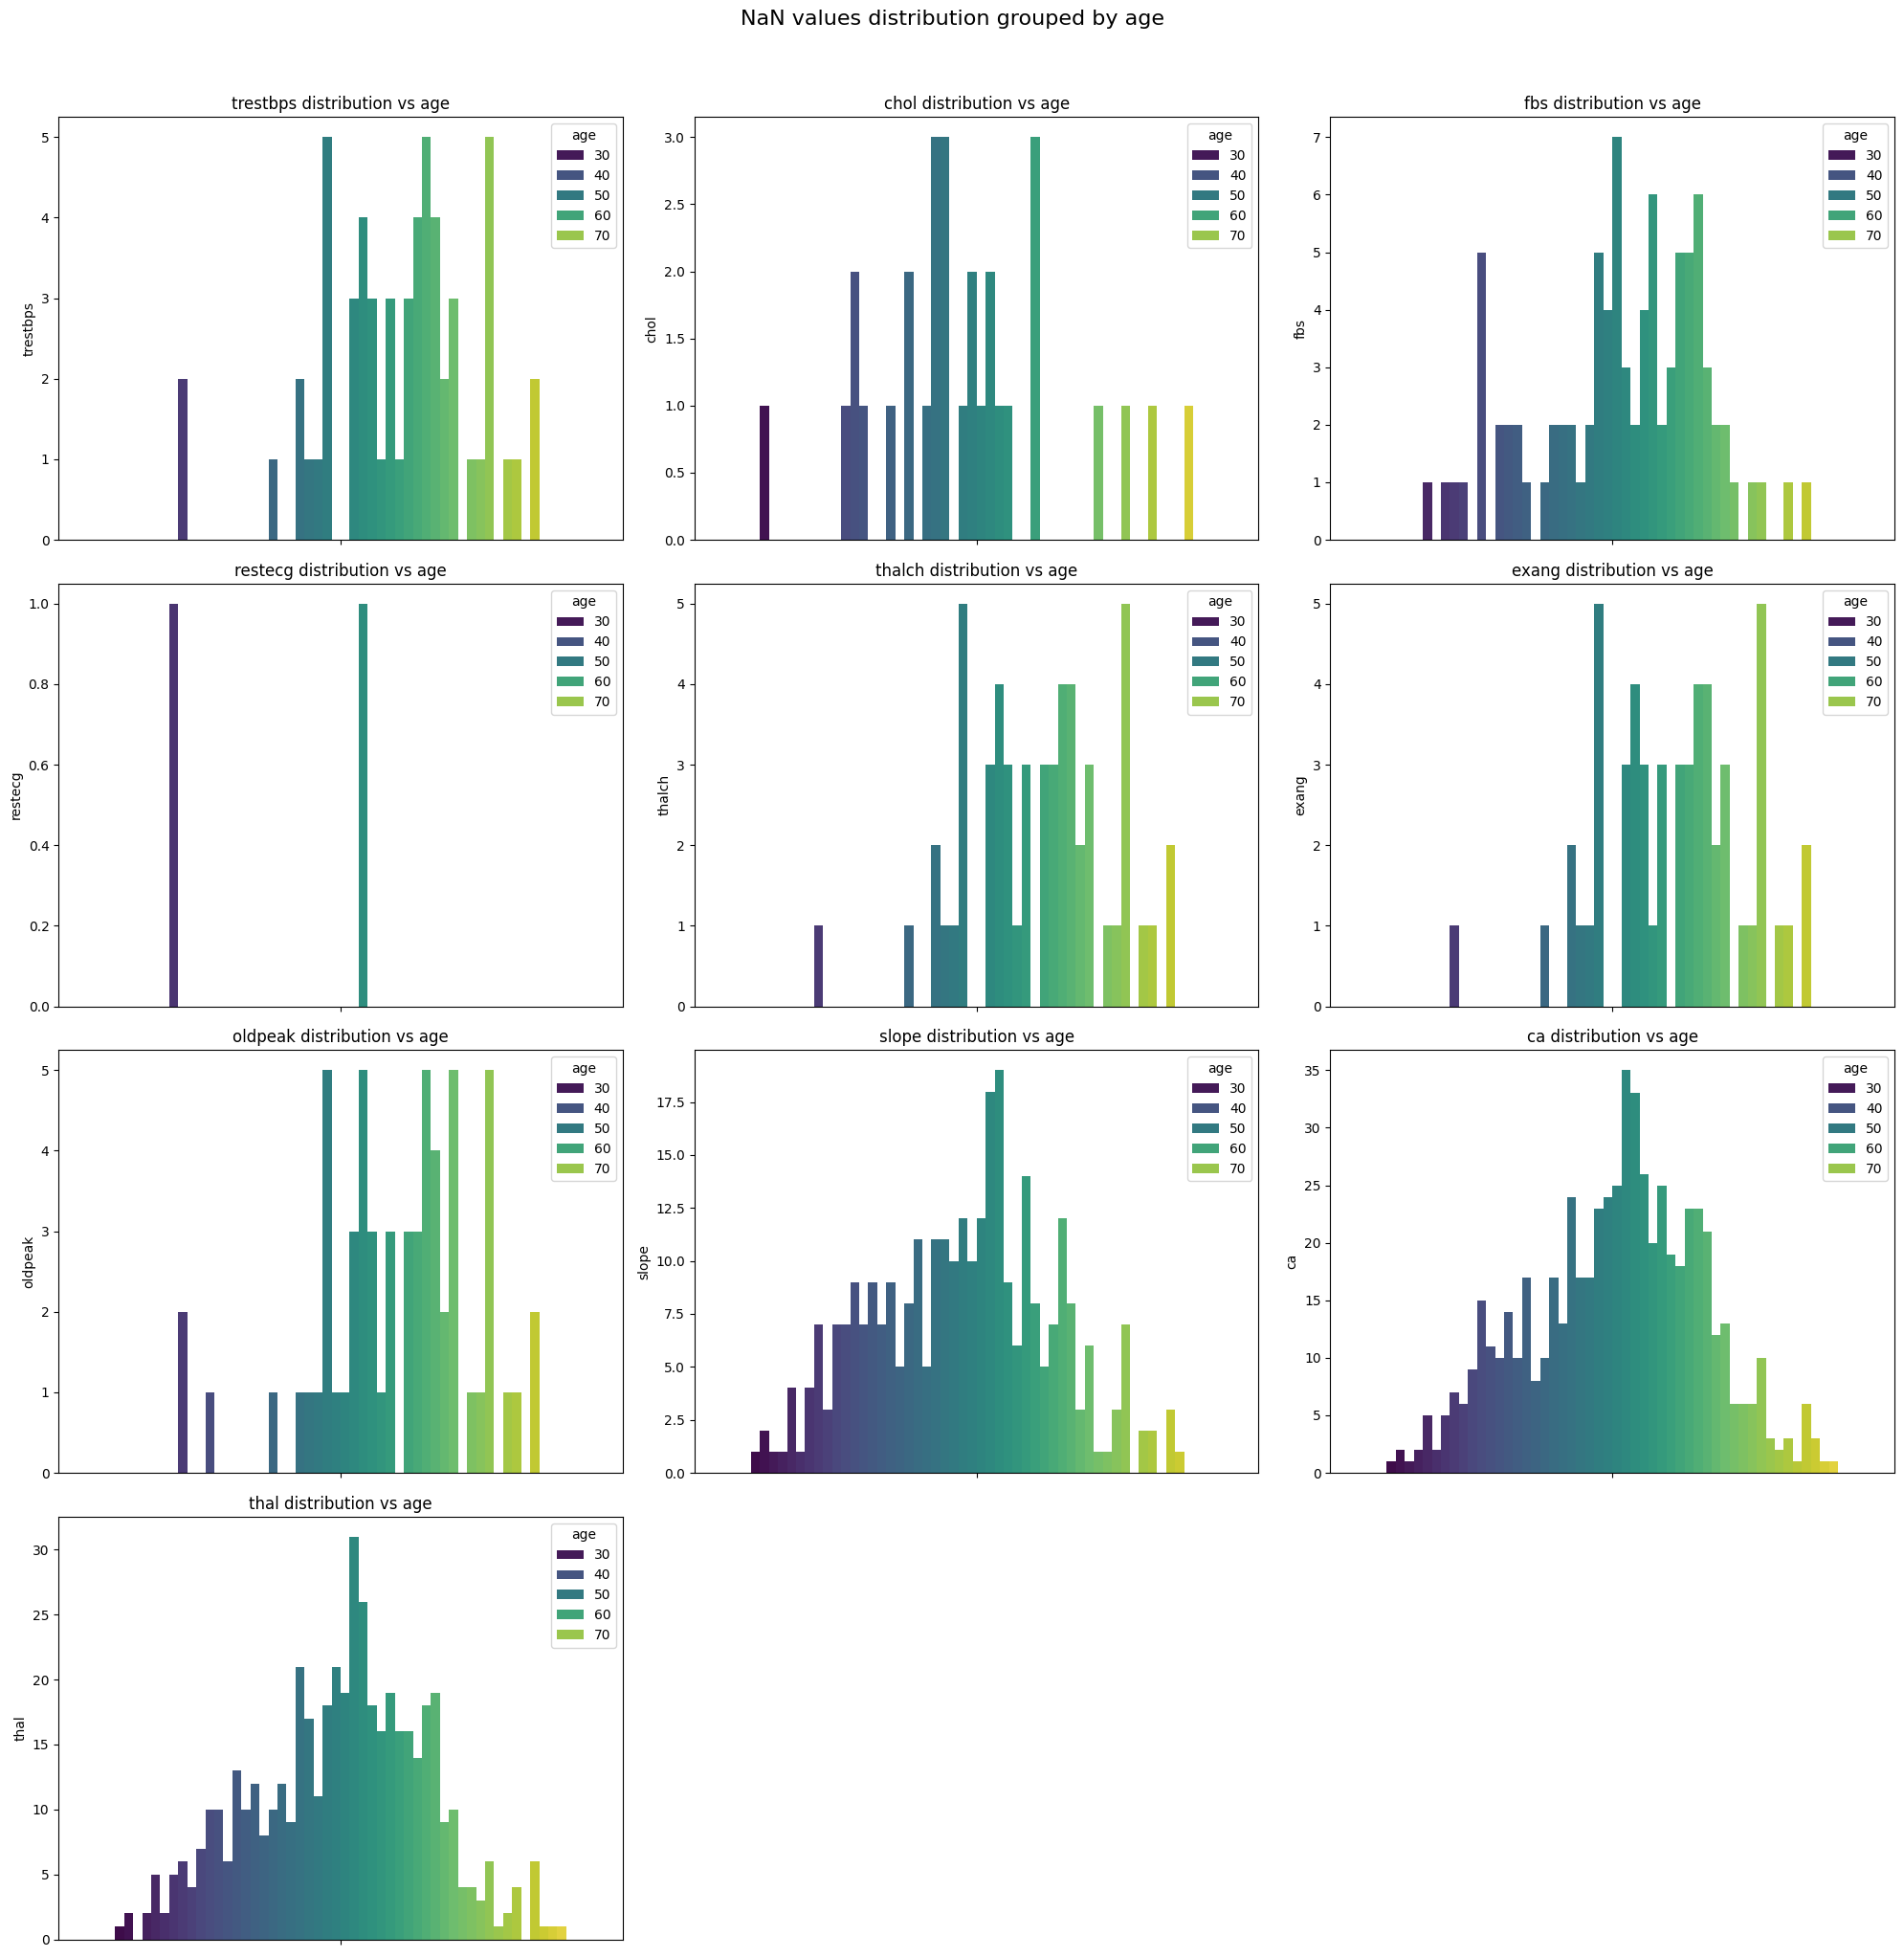

In [8]:
# Focus on NaN distribution in the dataset

# Get NaN values
df_is_nan_02 = raw_data.copy()
df_is_nan_02 = df_is_nan_02.isna()

# Drop variables that have no NaN values (all False)
df_is_nan_02 = df_is_nan_02.loc[:, df_is_nan_02.any()]

# List of features with NaN values
list_features_with_nan = df_is_nan_02.columns.tolist()

# List of objects features
list_categorical_features = ["sex", "dataset", "age"]

# Add the object features to the dataframe
df_is_nan_02[list_categorical_features] = raw_data[list_categorical_features]

# Group by object features create a new grouped dataframe and and add it to an array of grouped dataframes
grouped_dataframes = np.array([])
for obj_feature in list_categorical_features:

    df_temp = df_is_nan_02.groupby(obj_feature).sum()[list_features_with_nan]
    
    np.append(grouped_dataframes, df_temp)
    
    # Plot the grouped dataframes
    suptitle= f"NaN values distribution grouped by {obj_feature}"
    
    n_rows = 4
    n_cols = 3

    cols = df_temp.columns

    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))
    # Iterate over the columns
    for i, col in enumerate(cols):
        # Get the current axe
        ax = axs[i//n_cols, i%n_cols]

        # Plot the countplot
        sns.barplot(data=df_temp, y=col, hue=obj_feature, ax=ax, palette="viridis")
        
        # Set the title of the plot
        ax.set_title(col + " distribution vs " + obj_feature)

        # Rotate the x axis labels
        ax.tick_params(axis='x', rotation=45)

    # Hide empty subplots
    for i in range(len(cols), n_rows * n_cols):
        axs[i//n_cols, i%n_cols].axis("off")

    # Add a suptitle with better spacing
    plt.suptitle(suptitle, fontsize=16, y=1.02)  # Adjust y value to move title up
    plt.tight_layout(rect=[0, 0, 1, 0.99])  # Prevent suptitle overlap

    plt.tight_layout()
    plt.show()

# Keep only the columns with NaN values (above 0)
# df_is_nan_02 = df_is_nan_02

# grouped_dataframes

In [9]:
# Print rows where exang is NaN
print("Number of rows where exang is NaN:", raw_data[raw_data["exang"].isna()].shape[0])

# Print the rows where exang is NaN
print("Number of NaN values in others features at the same time:")
display(raw_data[raw_data["exang"].isna()].isna().sum())

Number of rows where exang is NaN: 55
Number of NaN values in others features at the same time:


age          0
sex          0
dataset      0
cp           0
trestbps    55
chol         3
fbs          0
restecg      0
thalch      55
exang       55
oldpeak     54
slope       54
ca          55
thal        53
num          0
dtype: int64

In [10]:
# Print rows where oldpeak is NaN
print("Number of rows where oldpeak is NaN:", raw_data[raw_data["oldpeak"].isna()].shape[0])

# Print the rows where exang is NaN
print("Number of NaN values in others features at the same time:")
display(raw_data[raw_data["oldpeak"].isna()].isna().sum())

Number of rows where oldpeak is NaN: 62
Number of NaN values in others features at the same time:


age          0
sex          0
dataset      0
cp           0
trestbps    55
chol         3
fbs          4
restecg      0
thalch      54
exang       54
oldpeak     62
slope       62
ca          62
thal        55
num          0
dtype: int64

In [11]:
# Print rows where ca is NaN
print("Number of rows where ca is NaN:", raw_data[raw_data["ca"].isna()].shape[0])

# Print the rows where exang is NaN
print("Number of NaN values in others features at the same time:")
display(raw_data[raw_data["ca"].isna()].isna().sum())

Number of rows where ca is NaN: 611
Number of NaN values in others features at the same time:


age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         29
fbs          85
restecg       2
thalch       55
exang        55
oldpeak      62
slope       306
ca          611
thal        476
num           0
dtype: int64

In [12]:
# Print rows where oldpeak is NaN
print("Number of rows where thal is NaN:", raw_data[raw_data["thal"].isna()].shape[0])

# Print the rows where exang is NaN
print("Number of NaN values in others features at the same time:")
display(raw_data[raw_data["thal"].isna()].isna().sum())

Number of rows where thal is NaN: 486
Number of NaN values in others features at the same time:


age           0
sex           0
dataset       0
cp            0
trestbps     55
chol         28
fbs          62
restecg       2
thalch       53
exang        53
oldpeak      55
slope       260
ca          476
thal        486
num           0
dtype: int64

In [13]:
# Get VA Long Beach data when exang, oldpeak, ca, thalch or thal are NaN
df_is_nan_03 = raw_data.copy()
df_is_nan_03 = df_is_nan_03[df_is_nan_03["dataset"] == "VA Long Beach"]
df_is_nan_03 = df_is_nan_03[df_is_nan_03["exang"].isna() | df_is_nan_03["oldpeak"].isna() | df_is_nan_03["ca"].isna() | df_is_nan_03["thal"].isna()]

# Print the rows where exang, oldpeak, ca, thalch or thal are NaN
print("Number of rows where exang, oldpeak, ca, thalch or thal are NaN:", df_is_nan_03.shape[0])

# Print rows where oldpeak and trestbps are NaN
print("Number of rows where oldpeak and trestbps are NaN:", raw_data[raw_data["oldpeak"].isna() & raw_data["trestbps"].isna()].shape[0])

# Print the rows where exang, oldpeak, ca, thalch or thal are NaN
print("\nNumber of NaN values in others features at the same time:")
display(data_exploration.resume_table(df_is_nan_03))

Number of rows where exang, oldpeak, ca, thalch or thal are NaN: 199
Number of rows where oldpeak and trestbps are NaN: 55

Number of NaN values in others features at the same time:


,type,nb_nan,nb_unique,v1,v2,v3
age,int64,0,39,63,44,60
sex,object,0,2,Male,Male,Male
dataset,object,0,1,VA Long Beach,VA Long Beach,VA Long Beach
cp,object,0,4,asymptomatic,asymptomatic,asymptomatic
trestbps,float64,56,40,140.0,130.0,132.0
chol,float64,7,98,260.0,209.0,218.0
fbs,object,7,2,False,False,False
restecg,object,0,3,st-t abnormality,st-t abnormality,st-t abnormality
thalch,float64,53,59,112.0,127.0,140.0
exang,object,53,2,True,False,True


In [14]:
# Get Hugary dataset shape
df_is_nan_04 = raw_data.copy()
df_is_nan_04 = df_is_nan_04[df_is_nan_04["dataset"] == "Hungary"]
print("Hungary dataset shape:", df_is_nan_04.shape)

# Print resume table
print("Hungary dataset resume table:")
display(data_exploration.resume_table(df_is_nan_04))

Hungary dataset shape: (293, 15)
Hungary dataset resume table:


,type,nb_nan,nb_unique,v1,v2,v3
age,int64,0,37,29,29,30
sex,object,0,2,Male,Male,Female
dataset,object,0,1,Hungary,Hungary,Hungary
cp,object,0,4,atypical angina,atypical angina,typical angina
trestbps,float64,1,31,120.0,140.0,170.0
chol,float64,23,152,243.0,NaN,237.0
fbs,object,8,2,False,False,False
restecg,object,1,3,normal,normal,st-t abnormality
thalch,float64,1,71,160.0,170.0,170.0
exang,object,1,2,False,False,False


In [15]:
# Count the number of NaN values for each dataset variable value

# Get if each value is NaN
dataset_var_is_nan = raw_data.isna()

# Get the raw dataset values
dataset_var_is_nan["dataset_raw"] = raw_data["dataset"]

# Keep only the variables that have NaN values (at least one True)
dataset_var_is_nan = dataset_var_is_nan.loc[:, dataset_var_is_nan.any()]

# Group by the dataset variable value and count the number of NaN values
dataset_var_is_nan = dataset_var_is_nan.groupby("dataset_raw").sum()

# Print the total number of NaN values
print("Total number of NaN values:", dataset_var_is_nan.sum().sum())

# Add a column with the total number of Nan values
dataset_var_is_nan["total_nan"] = dataset_var_is_nan.sum(axis=1)

# Add total count of values per dataset variable
dataset_var_is_nan["total_records"] = raw_data.groupby("dataset").count().max(axis=1) + dataset_var_is_nan["total_nan"]

# Add a column with the percentage of NaN values
dataset_var_is_nan["percentage_nan (%)"] = (dataset_var_is_nan["total_nan"] / dataset_var_is_nan["total_records"])* 100

# # Print the raw data shape
# print("Raw data shape:", raw_data.shape)

dataset_var_is_nan

Total number of NaN values: 1759


,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,total_nan,total_records,percentage_nan (%)
dataset_raw,,,,,,,,,,,,,
Cleveland,0,0,0,0,0,0,0,1,5,3,9,313,2.875399
Hungary,1,23,8,1,1,1,0,189,290,265,779,1072,72.667910
Switzerland,2,0,75,1,1,1,6,17,118,52,273,396,68.939394
VA Long Beach,56,7,7,0,53,53,56,102,198,166,698,898,77.728285


In [16]:
# Get the number of records per dataset
records_per_dataset = raw_data["dataset"].value_counts()

# Get the number of record with at least one NaN value per dataset
records_with_nan_per_dataset = raw_data[raw_data.isna().any(axis=1)]["dataset"].value_counts()

# Create a DataFrame with the number of records per dataset and the number of records with at least one NaN value per dataset
df_records_per_dataset = pd.concat([records_per_dataset, records_with_nan_per_dataset], axis=1)

# Rename columns
df_records_per_dataset.columns = ["Total records", "Records with NaN"]

# Add a column with the percentage of records with NaN values
df_records_per_dataset["Percentage records with NaN (%)"] = (df_records_per_dataset["Records with NaN"] / df_records_per_dataset["Total records"]) * 100

# Print the DataFrame
df_records_per_dataset

,Total records,Records with NaN,Percentage records with NaN (%)
dataset,,,
Cleveland,304,7,2.302632
Hungary,293,292,99.658703
VA Long Beach,200,199,99.500000
Switzerland,123,123,100.000000


### My interpretation of NaN values 

VA Long beach didn't perform a third of the patients exercise test leading directly or indirectly to NaN values in **`thalch`**, **`exang`**, **`oldpeak`**, **`trestbps`** & **`slope`**.
Specific equipment or setup is needed to measure **`slope`**,  **`thal`** & **`ca`**. The hospital may are not equiped to do it or the equipment where out of order during the patient visit. Especially Hugary
- 290/293 patients were not tested for Number of Major Vessels Colored by Fluoroscopy (**`ca`**)
- 265/293 patients were not tested for Thalassemia (**`thal`**)
- 189/293 patients were not tested for Slope of Peak Exercise ST Segment (**`slope`**). Not enough machines for all patients or it was installed during the data gathering

In addition, only Cleaveland dataset has a low amount of NaN values per patient (under 3%). Other datset have at least one missing information per patient for 99% of them.

# Some variables values are suspicious

- trestbps values at 0
- chol values at 0
- oldpeak values under 0


In [17]:
# Get trestbps values at 0 & NaN per dataset
print("trestbps values <= 0 per dataset:")
display(raw_data[raw_data["trestbps"] <= 0].groupby("dataset").count().iloc[:, 0])

raw_data[raw_data["trestbps"] <= 0]

trestbps values <= 0 per dataset:


dataset
VA Long Beach    1
Name: age, dtype: int64

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,3


chol values <= 0 per dataset:


dataset
Switzerland      123
VA Long Beach     49
Name: age, dtype: int64

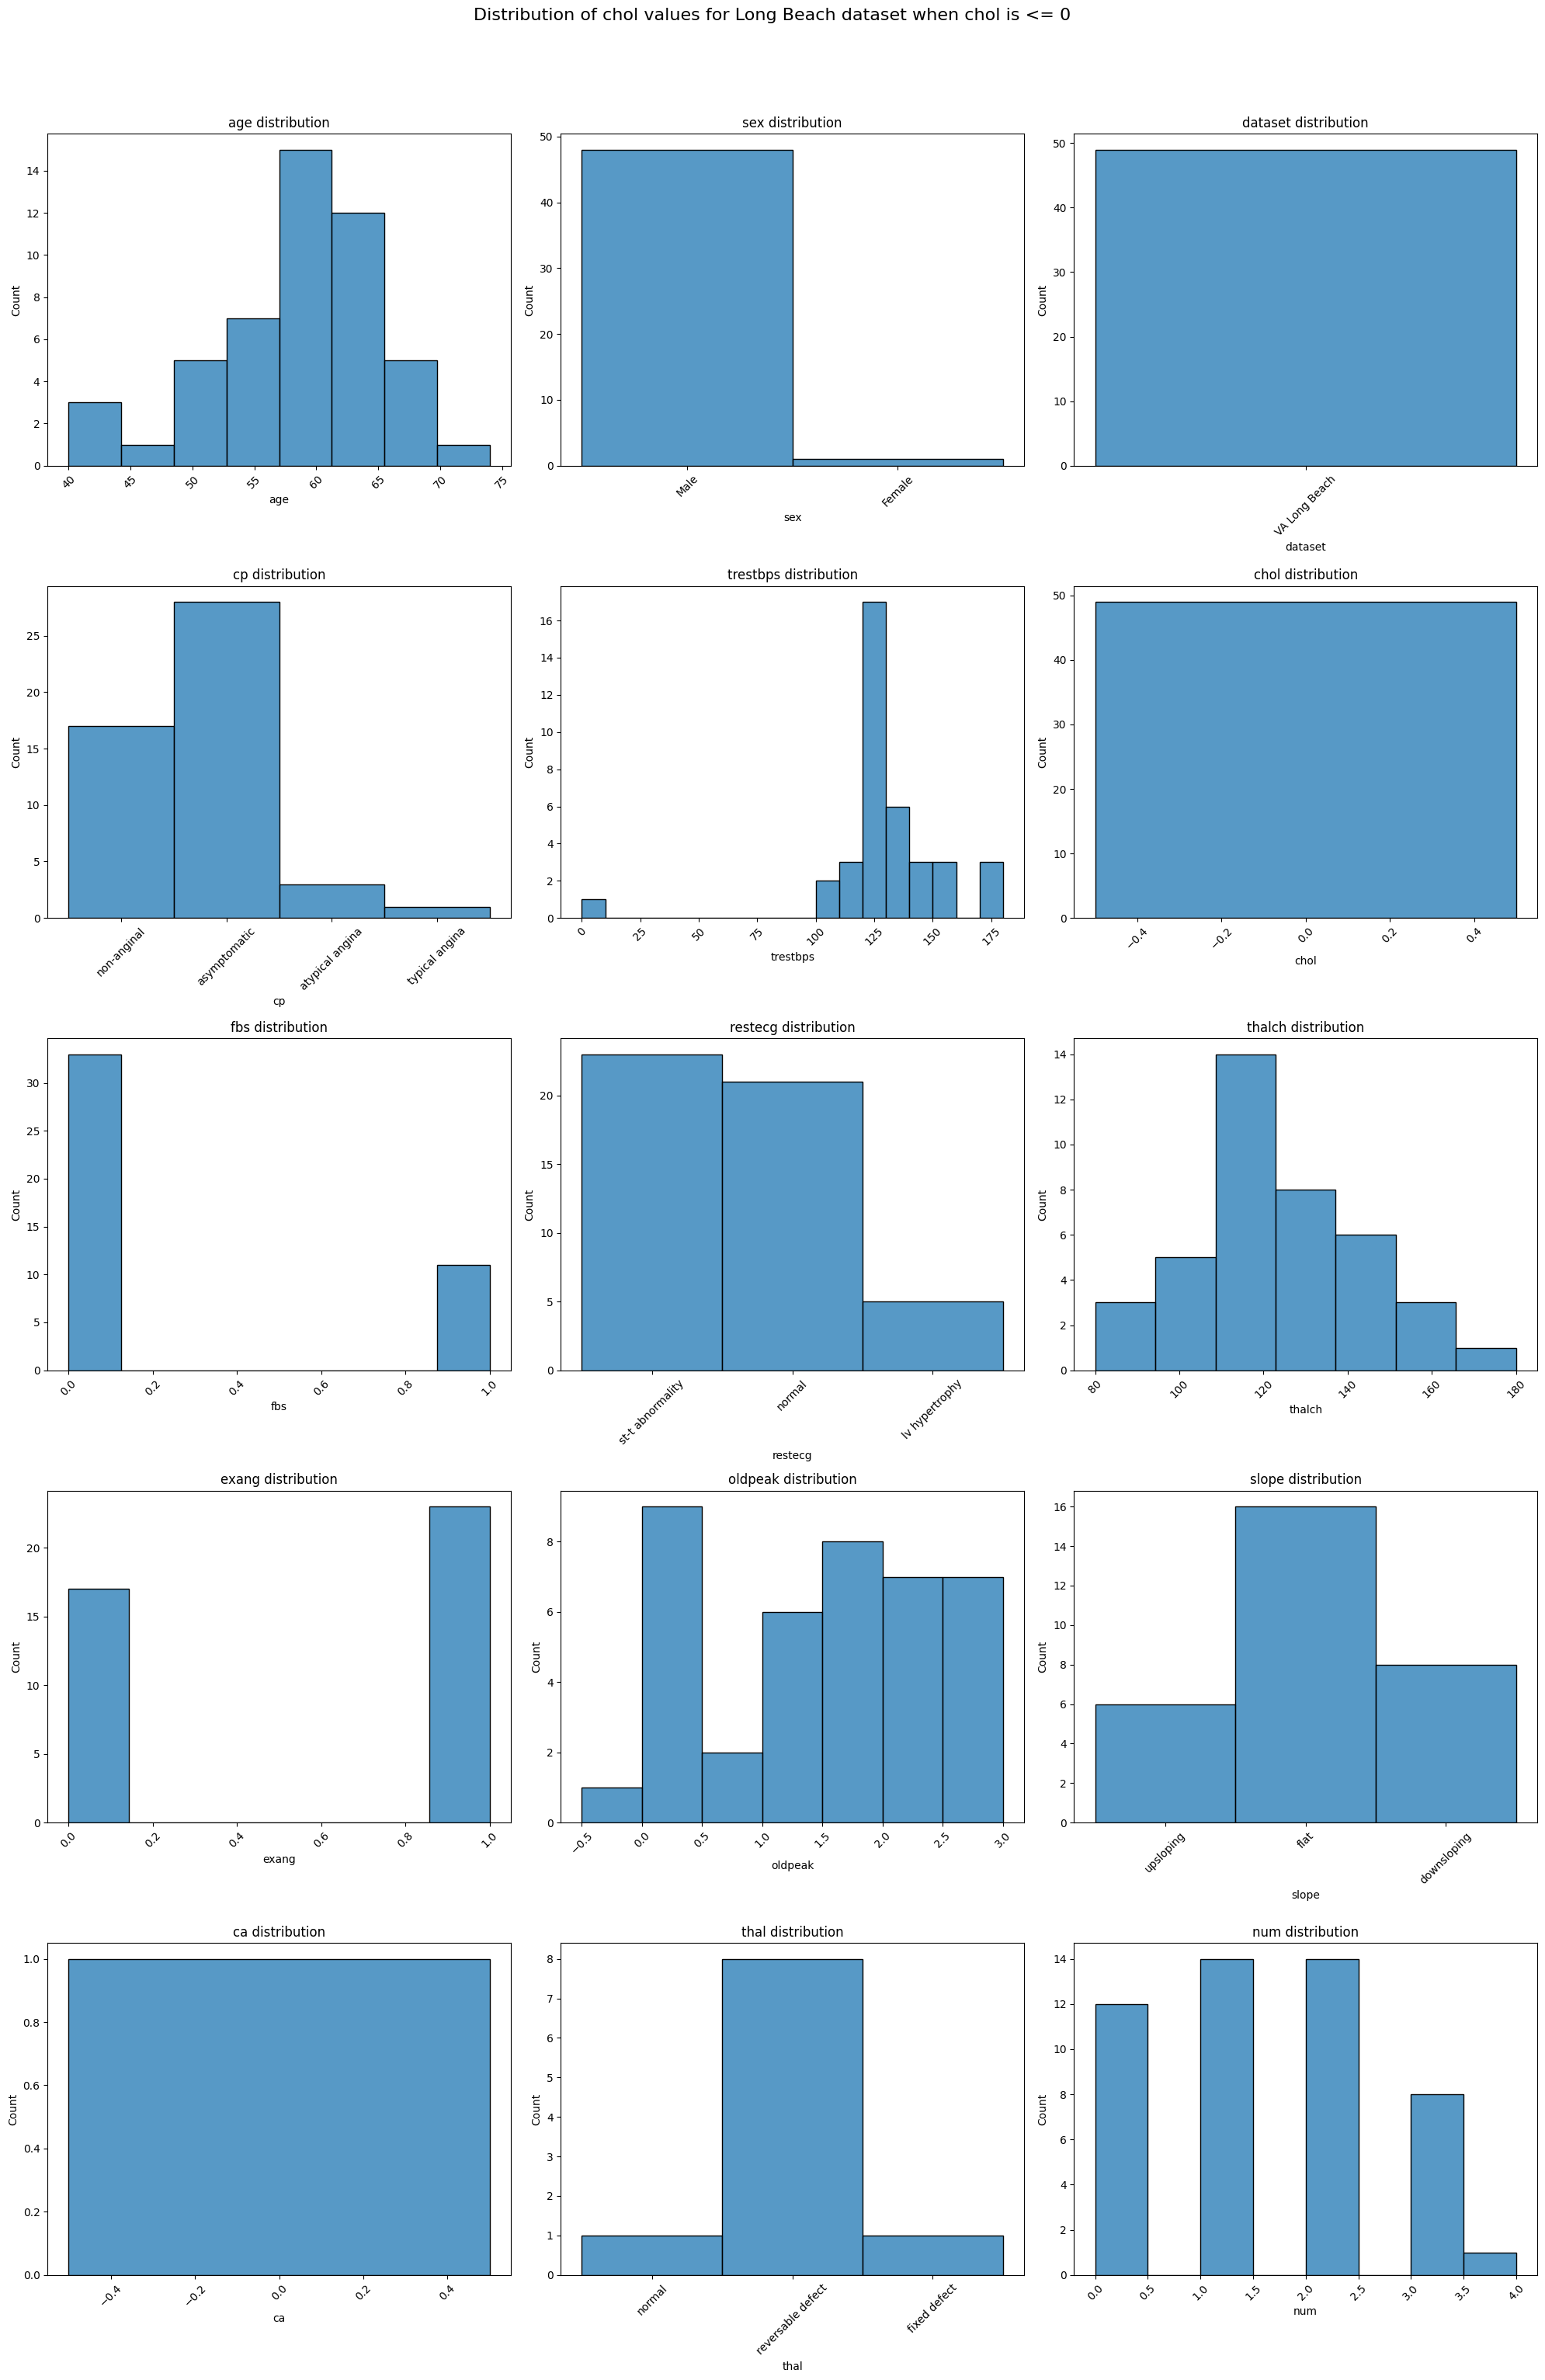

In [18]:
# Get chol values at 0 & NaN per dataset
print("chol values <= 0 per dataset:")
display(raw_data[raw_data["chol"] <= 0].groupby("dataset").count().iloc[:, 0])

# Plot the distribution of chol values for Long Beach dataset when chol is <= 0
data_exploration.distribution_matrix(df=raw_data[(raw_data["chol"] <= 0) & (raw_data["dataset"] == "VA Long Beach")], cols=raw_data.columns, dimensions=(5,3), figsize=(20, 30), suptitle="Distribution of chol values for Long Beach dataset when chol is <= 0")

oldpeak values <= 0 per dataset:


dataset
Cleveland        100
Hungary          188
Switzerland       53
VA Long Beach     41
Name: age, dtype: int64

oldpeak values <= 0 per num:


num
0    248
1     84
2     29
3     19
4      2
Name: age, dtype: int64

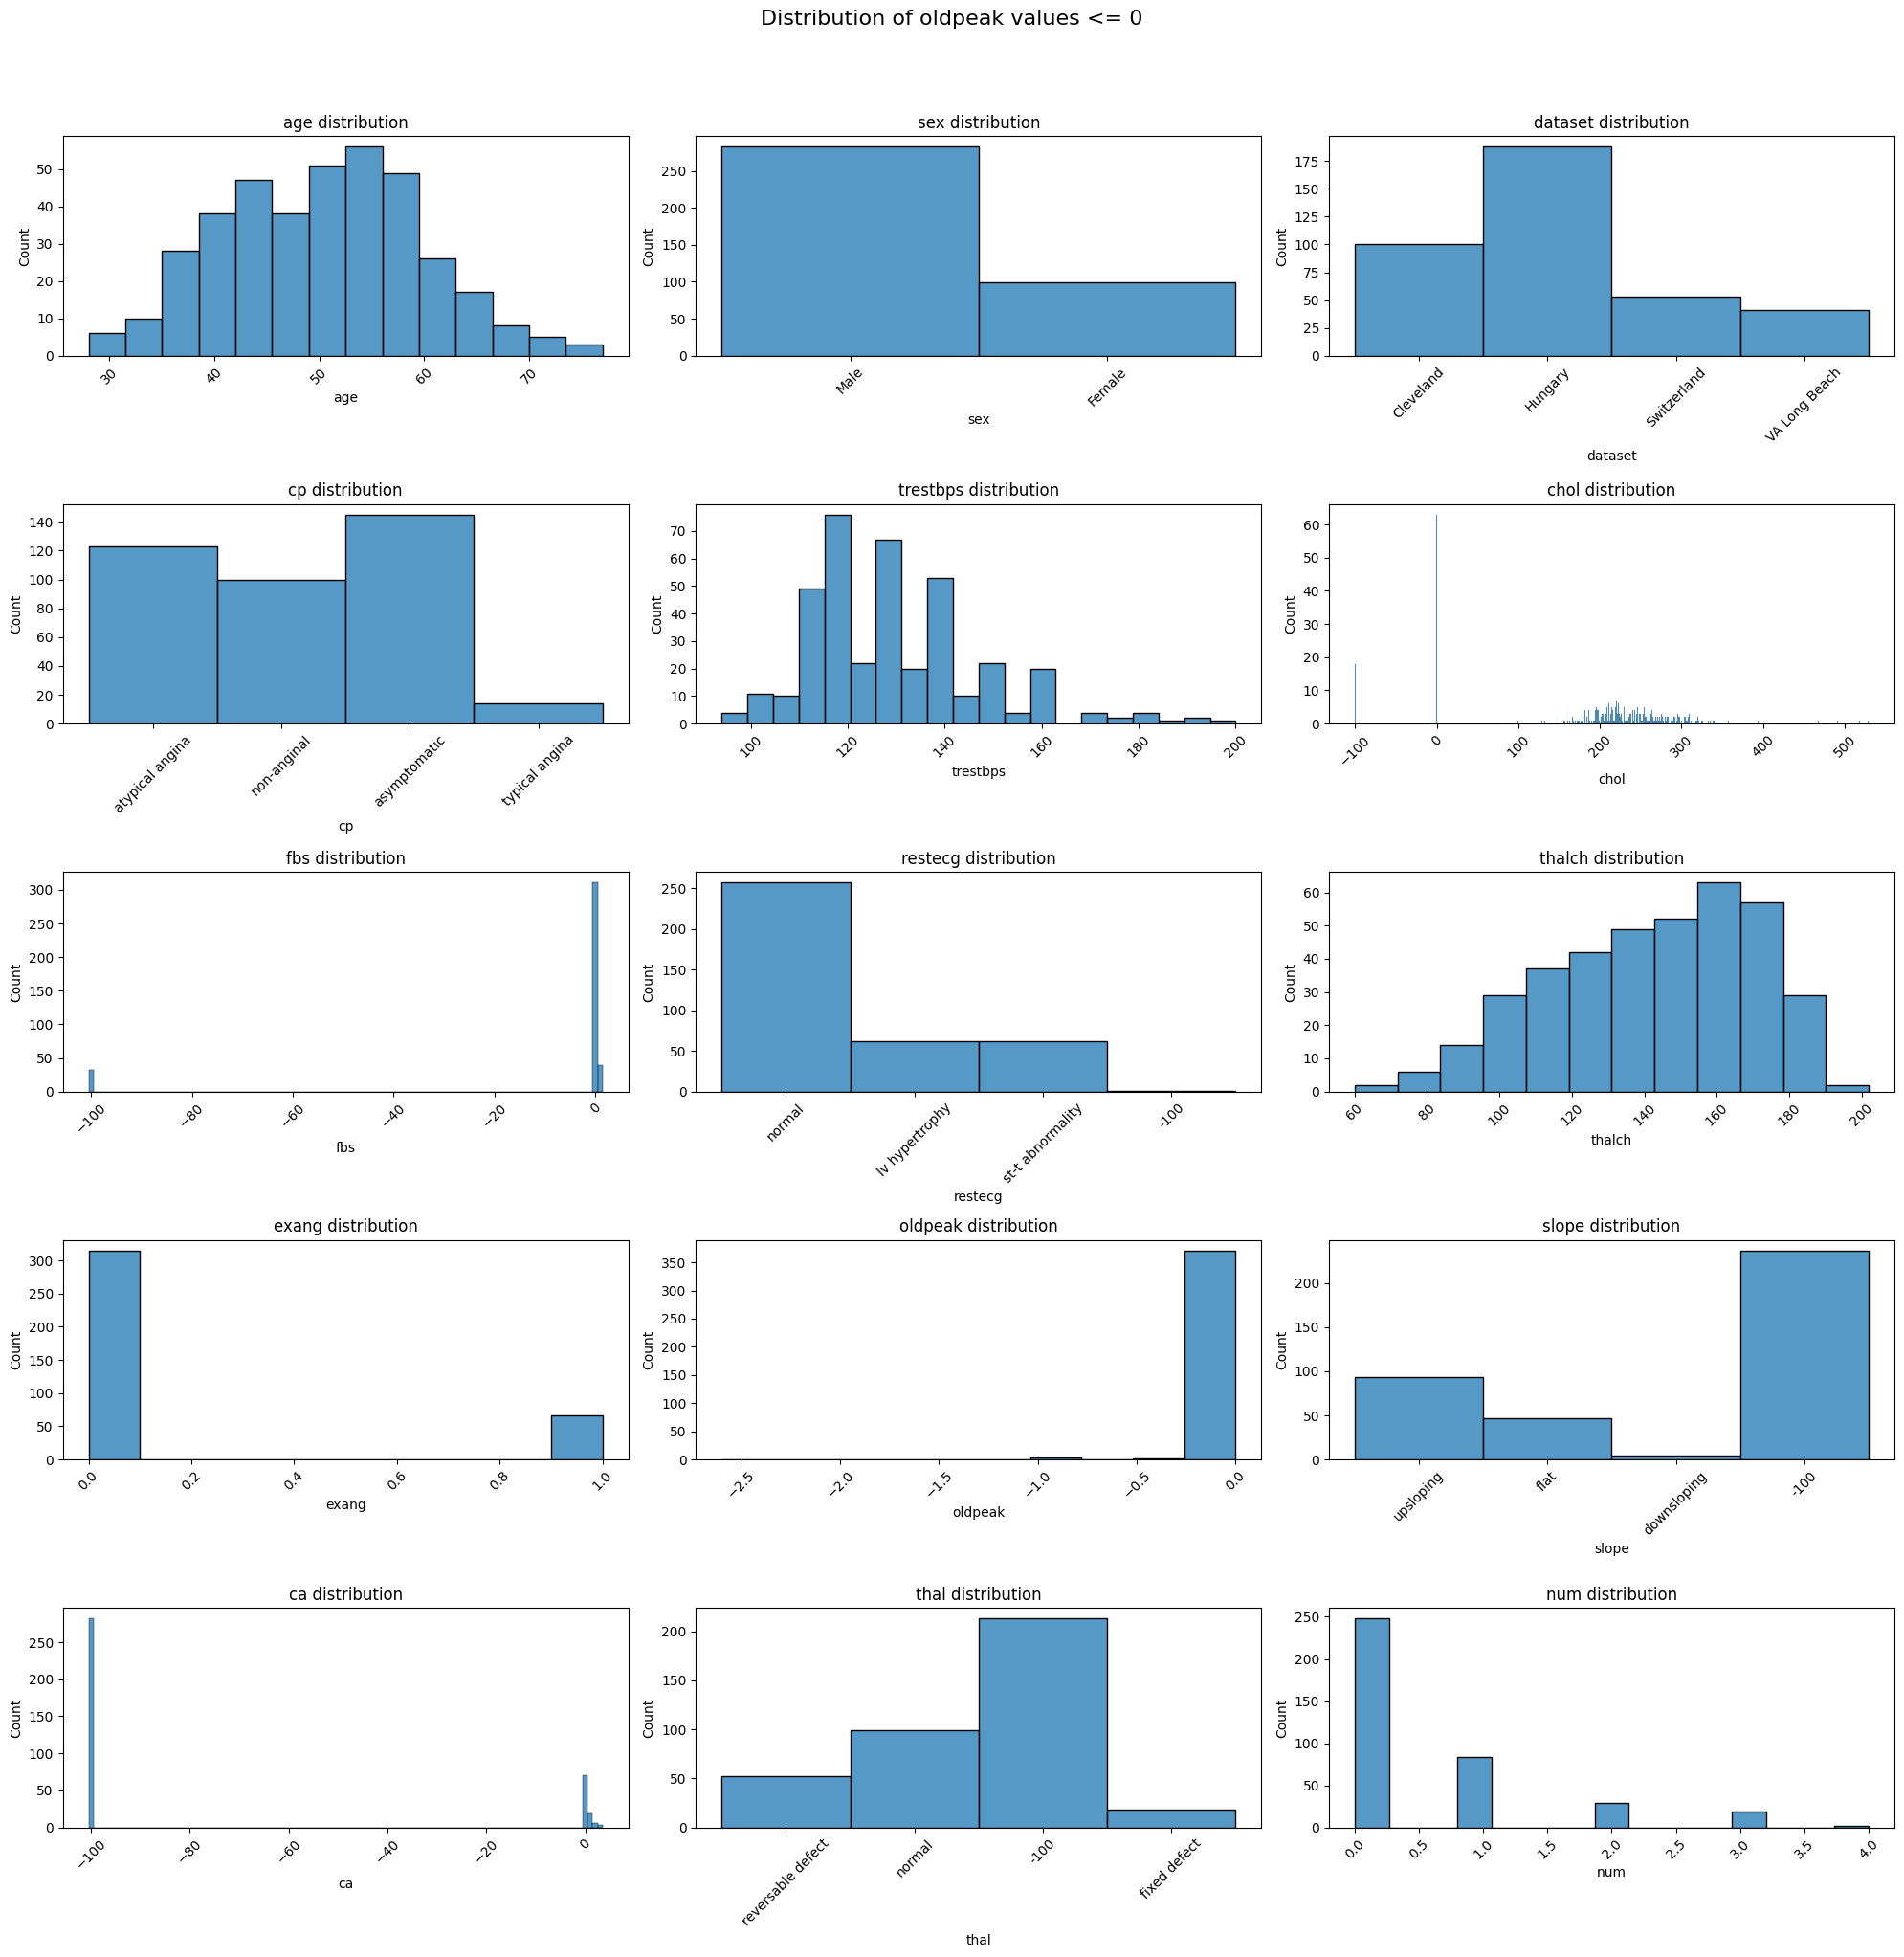

In [19]:
# Get oldpeak values at 0 & NaN per dataset
print("oldpeak values <= 0 per dataset:")

df_low_oldpeak = raw_data[raw_data["oldpeak"] <= 0]

display(df_low_oldpeak.groupby("dataset").count().iloc[:, 0])


print("oldpeak values <= 0 per num:")
# oldpeak values at 0 per num value
display(df_low_oldpeak.groupby("num").count().iloc[:, 0])

suptitle = "Distribution of oldpeak values <= 0"
data_exploration.distribution_matrix(df=raw_data[raw_data["oldpeak"] <= 0].infer_objects(copy=False).fillna("-100", inplace=False), cols=raw_data.columns, dimensions=(5,3), figsize=(20, 20), suptitle=suptitle)

### My interpretation of these suspicious values
- **`trestbps`**: Only one patient has a trestbps value of 0. It must be an outlier
- **`chol`**: A 0 mg/dL cholesterol is not possible. It is either an encoding error or a NaN value. All Switzerland patients have a chol value of 0, meaning they were not tested for it. Long Beach seems to have this part of the patients that didn't take the cholesterol test.
- **`oldpeak`**: The most probable explanation is that some values are valid and indicates an abscence of exercise tests.


In [26]:
# Focus on Cleveland dataset

df_Cleveland = raw_data.copy()
df_Cleveland = df_Cleveland[df_Cleveland["dataset"] == "Cleveland"]

# drop the dataset column
df_Cleveland.drop("dataset", axis=1, inplace=True)

# Print the shape of the Cleveland dataset
print("Cleveland dataset shape:", df_Cleveland.shape)

# Print the resume table of the Cleveland dataset
print("Cleveland dataset resume table:")
display(data_exploration.resume_table(df_Cleveland))

# Print NaN values in the Cleveland dataset
print("Cleveland dataset NaN values:")
display(df_Cleveland[df_Cleveland.isna().any(axis=1)])

Cleveland dataset shape: (304, 14)
Cleveland dataset resume table:


,type,nb_nan,nb_unique,v1,v2,v3
age,int64,0,42,63,67,67
sex,object,0,2,Male,Male,Male
cp,object,0,4,typical angina,asymptomatic,asymptomatic
trestbps,float64,0,50,145.0,160.0,120.0
chol,float64,0,153,233.0,286.0,229.0
fbs,object,0,2,True,False,False
restecg,object,0,3,lv hypertrophy,lv hypertrophy,lv hypertrophy
thalch,float64,0,91,150.0,108.0,129.0
exang,object,0,2,False,True,True
oldpeak,float64,0,40,2.3,1.5,2.6


Cleveland dataset NaN values:


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
88,53,Female,non-anginal,128.0,216.0,False,lv hypertrophy,115.0,False,0.0,upsloping,0.0,NaN,0
167,52,Male,non-anginal,138.0,223.0,False,normal,169.0,False,0.0,upsloping,NaN,normal,0
193,43,Male,asymptomatic,132.0,247.0,True,lv hypertrophy,143.0,True,0.1,flat,NaN,reversable defect,1
267,52,Male,asymptomatic,128.0,204.0,True,normal,156.0,True,1.0,flat,0.0,NaN,2
288,58,Male,atypical angina,125.0,220.0,False,normal,144.0,False,0.4,flat,NaN,reversable defect,0
303,38,Male,non-anginal,138.0,175.0,False,normal,173.0,False,0.0,upsloping,NaN,normal,0
304,28,Male,atypical angina,130.0,132.0,False,lv hypertrophy,185.0,False,0.0,NaN,NaN,NaN,0


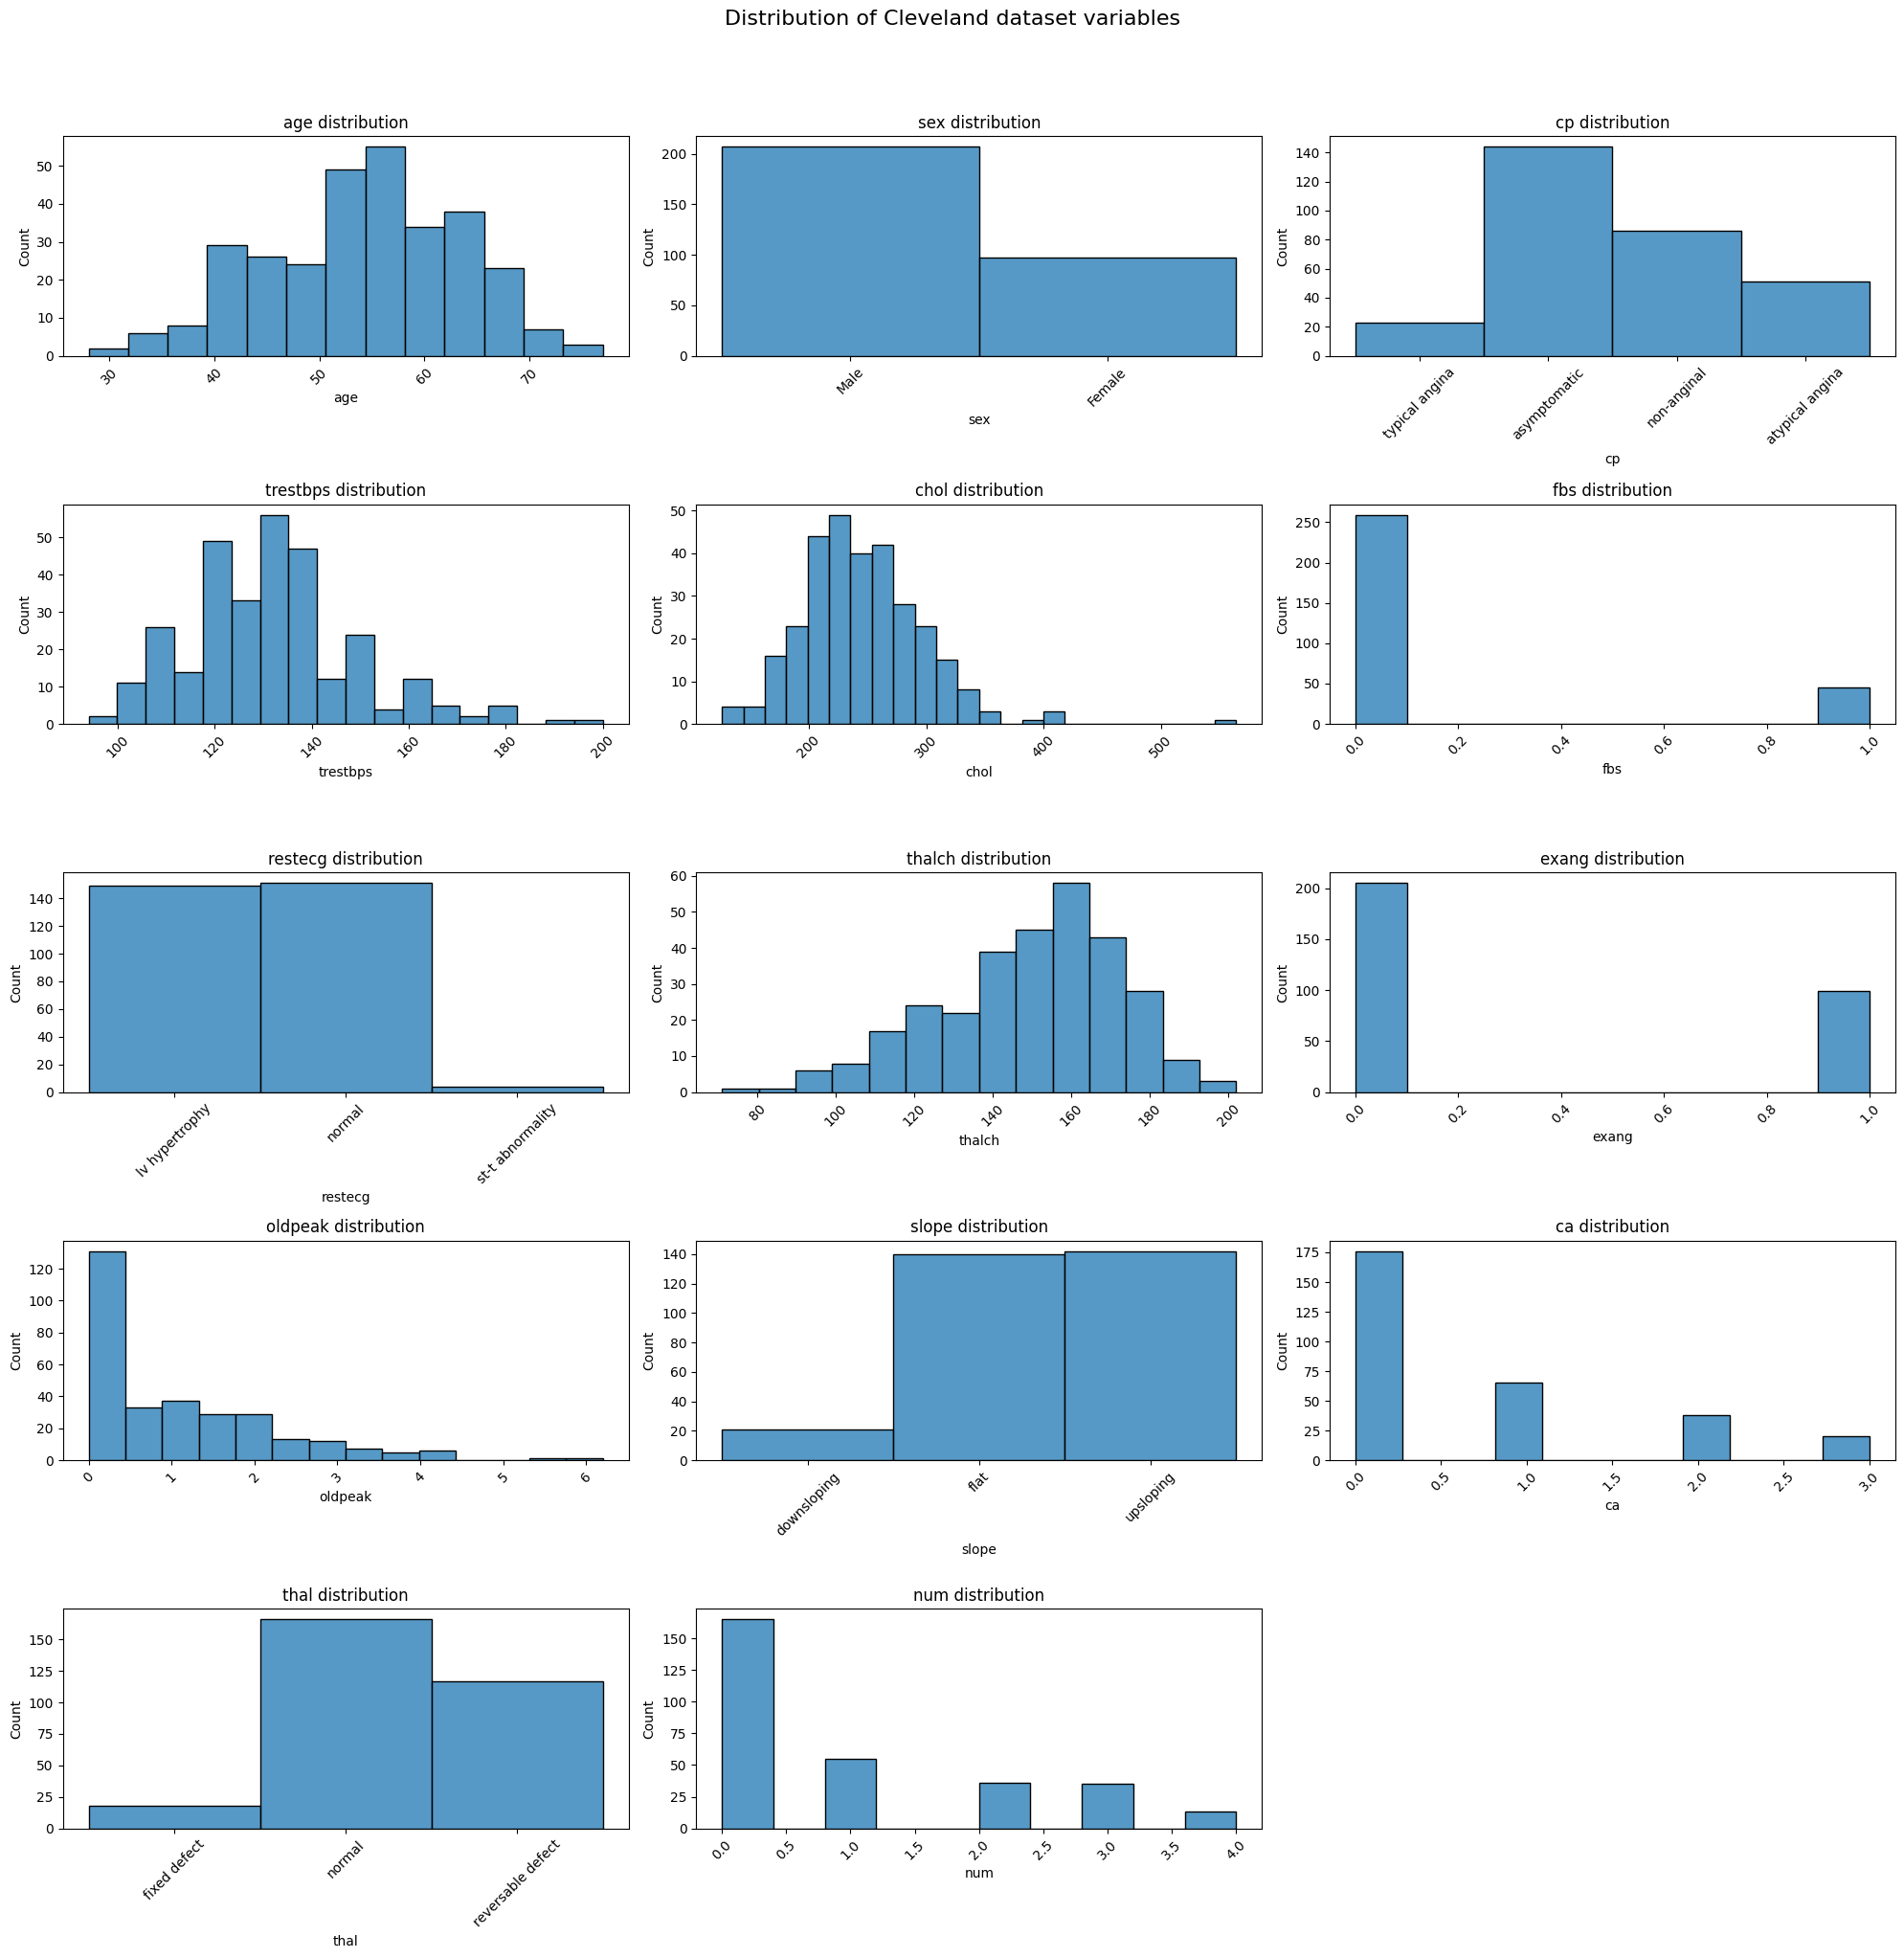

In [25]:
# Display the distribution of the Cleveland dataset variables
suptitle = "Distribution of Cleveland dataset variables"
data_exploration.distribution_matrix(df=df_Cleveland, cols=df_Cleveland.columns, dimensions=(5,3), figsize=(20, 20), suptitle=suptitle)

# My conclusion
Theres is a lot of uncomplete data outside of Cleveland data where NaN values are outliers (only 7 patients)\
I will add a new feature indicating the presence or abscence of exercise related tests to help understand the data.\
I will focus on a model including only Cleveland data. Then I will look at the main features used to predict the risk of heart disease to undertnad their impact.